# **Introduzione "Obesity Insight"**

Questo progetto si propone di costruire un modello predittivo per la classificazione dei livelli di obesità in individui provenienti da Colombia, Perù e Messico. Il modello si basa su dati raccolti tramite questionari sulle abitudini alimentari e le condizioni fisiche di un campione di individui.

Gli obiettivi principali del progetto sono:
- Analizzare il dataset per identificare le feature più rilevanti per la predizione del livello di obesità.
Addestrare e valutare diversi modelli di Machine Learning per la classificazione del livello di obesità.
- Selezionare il modello migliore in base alle sue prestazioni e alla sua capacità di generalizzare a nuovi dati.
- Costruire una Belief Network per modellare le relazioni tra le feature e il livello di obesità.

La metodologia adottata in questo progetto si articola nelle seguenti fasi:
- **Data Collection and Preprocessing**: Raccolta del dataset e pulizia dei dati, gestendo i valori mancanti e convertendo le variabili categoriche in numeriche tramite tecniche di encoding.
- **Feature Engineering**: Creazione di nuove feature derivate da quelle esistenti per migliorare le prestazioni dei modelli.
- **Model Selection and Training**: Selezione di diversi modelli di Machine Learning, training e ottimizzazione degli iperparametri tramite tecniche di cross-validation.
- **Model Evaluation and Comparison**: Valutazione delle performance dei modelli addestrati tramite metriche appropriate e confronto dei risultati per selezionare il modello migliore.
- **Belief Network Construction**: Costruzione di una Belief Network per modellare le relazioni tra le feature e il livello di obesità, utilizzando algoritmi di apprendimento automatico.

# Import librerie


Import delle varie librerie necessarie al funzionamento del progetto:
- **Kagglehub**: Questa libreria è stata utilizzata per scaricare il dataset da Kaggle direttamente in Google Colab. Semplifica l'accesso ai dataset pubblici di Kaggle e ne permette il download in locale.
- **Pandas**: E' una libreria fondamentale per la manipolazione e l'analisi dei dati. In questo progetto, è stata usata per leggere il dataset dal file CSV, pulirlo (rimuovendo duplicati e valori nulli), e per eseguire diverse operazioni di elaborazione dei dati come la creazione di nuove feature.
Numpy: Numpy è una libreria per il calcolo numerico in Python. In questo progetto, è stata utilizzata per eseguire operazioni matematiche sui dati, come l'arrotondamento dei valori delle colonne e il calcolo del BMI.
- **OS**: Questa libreria permette di interagire con il sistema operativo. In questo caso, è stata usata per gestire i percorsi dei file e per trovare il file CSV del dataset nella cartella di download.
- **Seaborn**: E' una libreria per la visualizzazione dei dati basata su Matplotlib. È stata utilizzata per creare grafici statistici come istogrammi, heatmap, boxplot e scatter plot per analizzare le relazioni tra le feature e il target.
- **Matplotlib**: E' una libreria per la creazione di grafici in Python. In questo progetto, è stata usata in combinazione con Seaborn per personalizzare i grafici e renderli più informativi.

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Download del dataset

In [ ]:
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        path = os.path.join(path, filename)
        break
print(path)

100%|██████████| 57.5k/57.5k [00:00<00:00, 15.0MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1/Obesity prediction.csv


Lettura del dataset e rimozione di elementi duplicati e di eventuali righe con valori nulli

In [ ]:
df = pd.read_csv(path)

# Rimozione duplicati
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)
  print("Duplicati rimossi")

# Rimozioni delle righe con valori nulli
if df.isnull().sum().sum() > 0:
  df.dropna(inplace=True)
  print("Righe con valori nulli rimosse")

# Informazioni utili sul dataset
print(f"Numero di casi: {df.shape[0]}")
print(f"Numero di feature: {df.shape[1]}")
print("Info sulle feauture")
df.info()
print("Alcune righe del dataset")
df.head()


Duplicati rimossi
Numero di casi: 2087
Numero di feature: 17
Info sulle feauture
<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   object 
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   object 
 5   FAVC            2087 non-null   object 
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   object 
 9   SMOKE           2087 non-null   object 
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   object 
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   object 
 15  MTRANS          2087 non-null   object 
 16  Ob

Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0  Sometimes   
3    Male  27.0    1.80    87.0             no   no   3.0  3.0  Sometimes   
4    Male  22.0    1.78    89.8             no   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   2.0   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  3.0  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

# Dettagli Dataset

Le informazioni riguardanti il dataset sono reperibili al seguente [link](https://pmc.ncbi.nlm.nih.gov/articles/PMC6710633/pdf/main.pdf) in maniera dettagliata o riassuntiva su [kaggle](https://www.kaggle.com/datasets/ruchikakumbhar/obesity-prediction/data)

### **Informazioni Generali**
- **Titolo**: Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico
- **Autori**: Fabio Mendoza Palechor e Alexis de la Hoz Manotas
- **Data di Pubblicazione**: 2019
- **Giornale**: *Data in Brief*

### **Descrizione del Dataset**
Il dataset è stato creato per stimare i livelli di obesità basandosi sugli abitudini alimentari e sulle condizioni fisiche degli individui provenienti dal Messico, Perù e Colombia. Contiene **17 attributi** e **2111 record**, etichettati con una variabile di classe chiamata **NObesity (Livello di Obesità)**.

#### **Categorie di Classificazione**
I record sono classificati in sette categorie:
1. **Peso Insufficiente**
2. **Peso Normale**
3. **Sovrappeso Livello I**
4. **Sovrappeso Livello II**
5. **Obesità Tipo I**
6. **Obesità Tipo II**
7. **Obesità Tipo III**

**Fonte dei Dati**:
   - **23% dei dati** sono stati raccolti direttamente dagli utenti tramite un sondaggio online.
   - **77% dei dati** sono stati generati sinteticamente utilizzando lo strumento **Weka** e il filtro **SMOTE** (Synthetic Minority Over-sampling Technique).

### **Attributi del Dataset**
#### **Abitudini Alimentari**:
- Consumo frequente di cibi ad alto contenuto calorico (**FAVC**)
- Frequenza di consumo di verdure (**FCVC**)
- Numero di pasti principali giornalieri (**NCP**)
- Consumo di cibo tra i pasti (**CAEC**)
- Quantità d'acqua bevuta giornalmente (**CH2O**)
- Consumo di alcol (**CALC**)

#### **Condizioni Fisiche**:
- Monitoraggio del consumo di calorie (**SCC**)
- Frequenza di attività fisica (**FAF**)
- Tempo trascorso nell'uso di dispositivi tecnologici (**TUE**)
- Mezzo di trasporto utilizzato (**MTRANS**)

#### **Altri Dati**:
- Sesso
- Età
- Altezza
- Peso

## Descrizione delle feature

Una **feature** rappresenta una colonna (o un attributo) di un dataset.

**Descrizioni delle feature del dataset**:
*   `Gender`: Female o Male
*   `Age`: Numeric value
*   `Height`: Numeric value in metres
*   `Weight`: Numeric value in kgs
*   `family_history`: Has a family member suffered or suffers from overweight? yes or no
*   `FAVC`: Do you eat high caloric food frequently? yes or no
*   `FCVC`: Do you usually eat vegetables in your meals? never: 1, sometimes: 2, always: 3
*   `NCP`: How many main meals do you have daily? one, two, three or more than three
*   `CAEC`: Do you eat any food between meals? no, sometimes, frequently or always
*   `SMOKE`: Do you smoke? yes or no
*   `CH2O`: How much water do you drink daily? less than a liter: 1, between 1 and 2 L: 2, more than 2 L: 3
*   `SCC`: Do you monitor the calories you eat daily? yes or no
*   `FAF`: How often do you have physical activity? I do not have: 0, 1 or 2 days: 1, 2 or 4 days: 2, 4 or 5 days: 3
*   `TUE`: How much time do you use technological devices such as cell phone, videogames, television, computer and others? between 0 and 2 hours: 0, between 3 and 5 hours: 1, more than 5 hours: 2
*   `CALC`: How often do you drink alcohol? no, sometimes, frequently, always
*   `MTRANS`: Which transportation do you usually use? Automobile, Motorbike, Bike, Public_Transportation or Walking

**Feature target**:
*   `Obesity_level`: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II or Obesity_Type_III

**Osservazioni**
*   le colonne `Age`, `FCVC`, `NCP`, `CH2O`, `FAF` e `TUE` risultano essere float invece che interi, dato che il 77% dei dati è stato generato sinteticamente utilizzando lo strumento Weka e il filtro SMOTE, quindi è necessario una operazione di arrontondamento per difetto dei valori di queste colonne;
*   le colonne `CH2O`, `FAF` e `TUE` secondo il [paper](https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011) non dovrebbero essere valori interi ma categorici, quindi è necessario trattarli come tali;
*   le restanti colonne sono categoriche, per cui sono necessarie operazioni di Encoding per mapparle a valori interi.

In [ ]:
# Classe che permette una mapping tra valori ad numeri interi
class Encoder:
    def __init__(self, start_value=0):
        self.mapping = {}
        self.__start_value = start_value

    def fit(self, array):
        unique_values = pd.Series(array).unique()
        self.mapping = {value: idx + self.__start_value for idx, value in enumerate(unique_values)}

    def fit_transform(self, array, values=None):
        if values:
            self.fit(values)
        else:
            self.fit(array)
        return self.transform(array)

    def transform(self, array):
        if self.mapping:
            return np.array([self.mapping[value] for value in array])
        raise Exception("Nessun mapping presente. Usare il metodo 'fit' prima.")

    def inverse_transform(self, vals):
        reverse_mapping = {v: k for k, v in self.mapping.items()}
        if isinstance(vals, (int, np.integer)):
            try:
                return reverse_mapping[vals]
            except KeyError:
                raise KeyError(f"Valore {vals} non trovato nel mapping")

        try:
            return np.array([reverse_mapping[value] for value in vals])
        except KeyError as e:
            raise KeyError(f"Valore {e.args[0]} non trovato nel mapping")

    def __str__(self):
        return '\n'.join(f"{key} -> {value}" for key, value in self.mapping.items())

    def toFormattedString(self, tabs=1):
        tab = '\t' * tabs
        return ''.join(f'{tab}{key} -> {value}\n' for key, value in self.mapping.items())


In [ ]:
# Arrotondamneto dei valori delle colonne
cols_numeric = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[cols_numeric] = np.ceil(df[cols_numeric]).astype(pd.Int64Dtype())

# Colonne prettamente numeriche
cols_numeric = ['Age', 'Height', 'Weight']

# Mapping delle variabili categoriche
label_encoders = {}
cols_categorical = ['Gender', 'family_history', 'FAVC', 'FCVC',  'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']

yes_no_response = ['no', 'yes']
for col in cols_categorical:
    val = 0
    if col in ['FCVC', 'NCP', 'CH2O']:
        val = 1
    label_encoders[col] = Encoder(val)

df['Gender'] = label_encoders['Gender'].fit_transform(df['Gender'], ['Female', 'Male'])
df['family_history'] = label_encoders['family_history'].fit_transform(df['family_history'], yes_no_response)
df['FAVC'] = label_encoders['FAVC'].fit_transform(df['FAVC'], yes_no_response)
label_encoders['FCVC'].fit(['Never', 'Sometimes', 'Always'])
label_encoders['NCP'].fit(['One ', 'Two', 'Three', 'More than three'])
df['CAEC'] = label_encoders['CAEC'].fit_transform(df['CAEC'], ['no', 'Sometimes', 'Frequently', 'Always'])
df['SMOKE'] = label_encoders['SMOKE'].fit_transform(df['SMOKE'], yes_no_response)
label_encoders['CH2O'].fit(['less than a liter', 'between 1 and 2 L', 'more than 2 L'])
df['SCC'] = label_encoders['SCC'].fit_transform(df['SCC'], yes_no_response)
label_encoders['FAF'].fit(['I do not have', '1 or 2 days', '2 or 4 days', '4 or 5 days'])
label_encoders['TUE'].fit(['between 0 and 2 hours', 'between 3 and 5 hours', 'more than 5 hours'])
df['CALC'] = label_encoders['CALC'].fit_transform(df['CALC'], ['no', 'Sometimes', 'Frequently', 'Always'])
df['MTRANS'] = label_encoders['MTRANS'].fit_transform(df['MTRANS'], ['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'])
df['Obesity'] = label_encoders['Obesity'].fit_transform(df['Obesity'], ['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

df.info()
df.head()

# df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   int64  
 1   Age             2087 non-null   Int64  
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   int64  
 5   FAVC            2087 non-null   int64  
 6   FCVC            2087 non-null   Int64  
 7   NCP             2087 non-null   Int64  
 8   CAEC            2087 non-null   int64  
 9   SMOKE           2087 non-null   int64  
 10  CH2O            2087 non-null   Int64  
 11  SCC             2087 non-null   int64  
 12  FAF             2087 non-null   Int64  
 13  TUE             2087 non-null   Int64  
 14  CALC            2087 non-null   int64  
 15  MTRANS          2087 non-null   int64  
 16  Obesity         2087 non-null   int64  
dtypes: Int64(6), float64(2), int64(9)
memo

Gender  Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  SMOKE  \
0       0   21    1.62    64.0               1     0     2    3     1      0   
1       0   21    1.52    56.0               1     0     3    3     1      1   
2       1   23    1.80    77.0               1     0     2    3     1      0   
3       1   27    1.80    87.0               0     0     3    3     1      0   
4       1   22    1.78    89.8               0     0     2    1     1      0   

   CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity  
0     2    0    0    1     0       3        1  
1     3    1    3    0     1       3        1  
2     2    0    2    1     2       3        1  
3     2    0    2    0     2       4        2  
4     2    0    0    0     1       3        3

# Analisi e selezione delle feature: eliminazione e aggiunta di feature



La selezione delle feature è un passaggio fondamentale per migliorare la qualità del dataset e garantire che i modelli siano efficienti e precisi. In questa fase:
1.  Elimineremo le feature che risultano poco informative o ridondanti.
2.  Aggiungeremo nuove feature derivate dalla conoscenza del dominio per arricchire il dataset.

L'obiettivo è creare un dataset ottimizzato per la fase di apprendimento supervisionato.

In [ ]:
# operazioni di ricreazione del dataset iniziale per una migliore rappresentazione su grafici
df_for_plotting = df.copy()

for col in cols_categorical:
    df_for_plotting[col] = label_encoders[col].inverse_transform(df_for_plotting[col])

## Analisi delle Correlazioni

Prima di procedere con la modellazione, è fondamentale comprendere le relazioni tra le feature numeriche del dataset. Questa analisi ci aiuterà a identificare:
1. Le feature più correlate con il target (`Obesity_level`), che saranno probabilmente le più rilevanti per la predizione.
2. Le feature altamente correlate tra loro (multicollinearità), che potrebbero essere ridondanti e influenzare negativamente i modelli di apprendimento automatico.

Per questo scopo, calcoliamo la matrice di correlazione e visualizziamo i risultati tramite una heatmap.

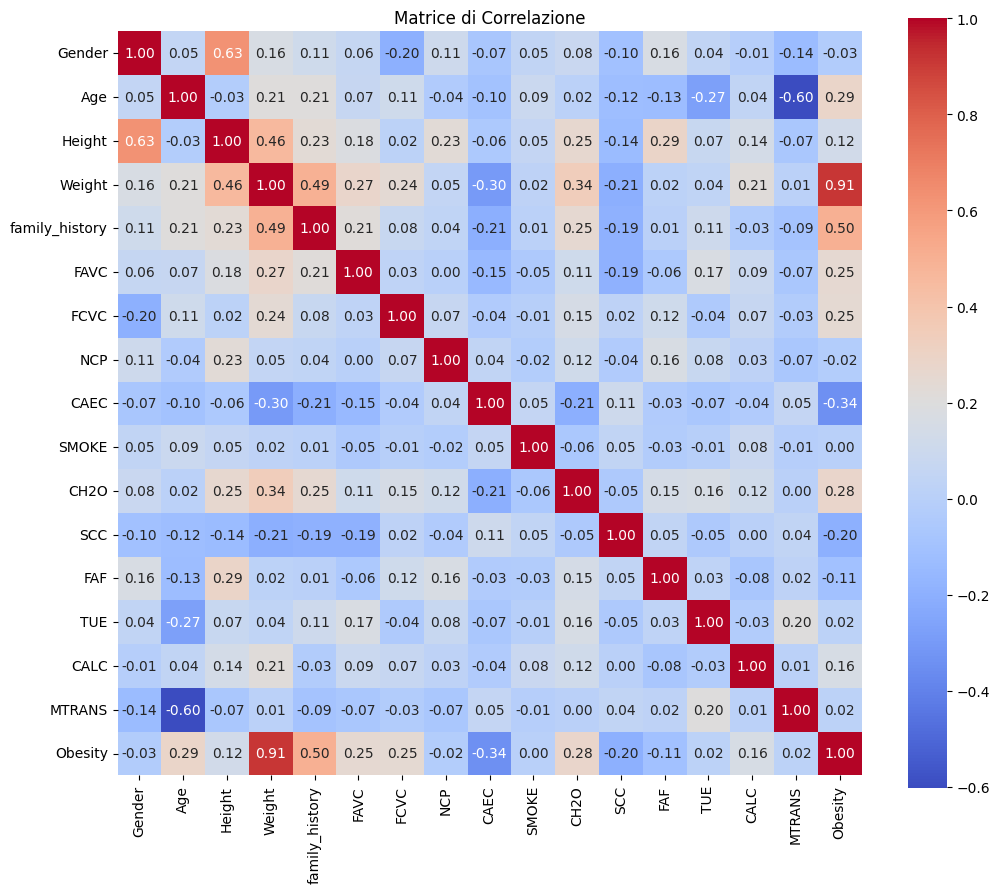


Correlazioni con il Target (Obesity):


Obesity           1.000000
Weight            0.912453
family_history    0.503374
Age               0.285829
CH2O              0.275018
FAVC              0.249927
FCVC              0.246722
CALC              0.155300
Height            0.124863
TUE               0.020493
MTRANS            0.016672
SMOKE             0.001984
NCP              -0.024687
Gender           -0.031920
FAF              -0.106130
SCC              -0.197819
CAEC             -0.342205
Name: Obesity, dtype: float64


Feature Altamente Correlate:
Weight - Obesity: 0.91


In [ ]:
# Calcolo della matrice di correlazione
correlation_matrix = df.corr()

# Visualizzazione della heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Matrice di Correlazione")
plt.show()

# Estrazione delle correlazioni con il target
target_correlations = correlation_matrix['Obesity'].sort_values(ascending=False)
print("\nCorrelazioni con il Target (Obesity):")
display(target_correlations)

# Identificazione di feature altamente correlate tra loro (multicollinearità)
highly_correlated_pairs = []
threshold = 0.8  # Soglia per identificare alta correlazione
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if i != j and abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if highly_correlated_pairs:
    print("\nFeature Altamente Correlate:")
    for pair in highly_correlated_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.2f}")
else:
    print("\nNessuna coppia di feature altamente correlate trovata.")

## Variabili numeriche

### Distribuzioni delle Feature Numeriche

Le distribuzioni delle feature numeriche ci permettono di capire come i dati sono strutturati e se esistono anomalie o skeweness. Usiamo istogrammi e KDE plots per visualizzare queste distribuzioni.

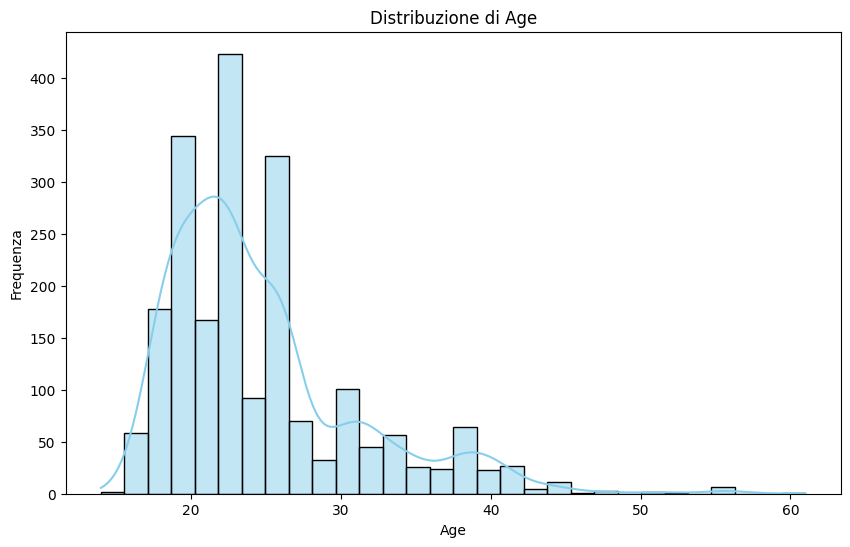

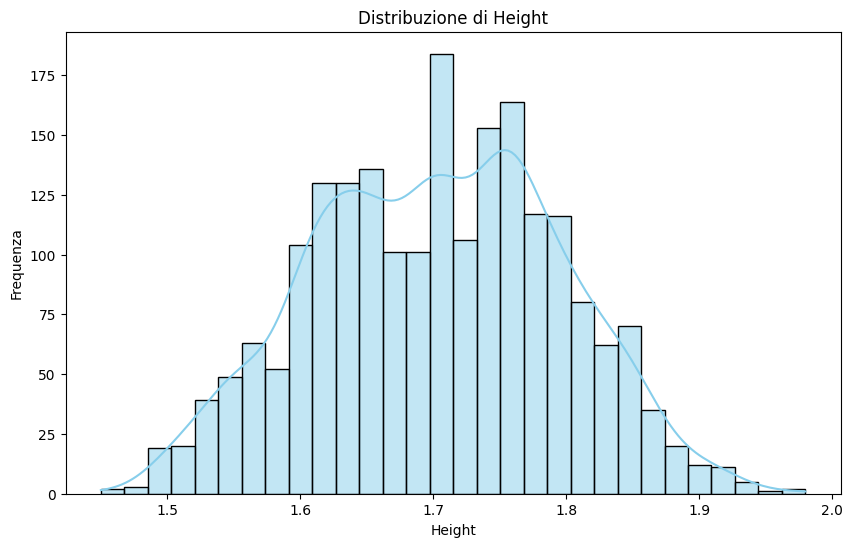

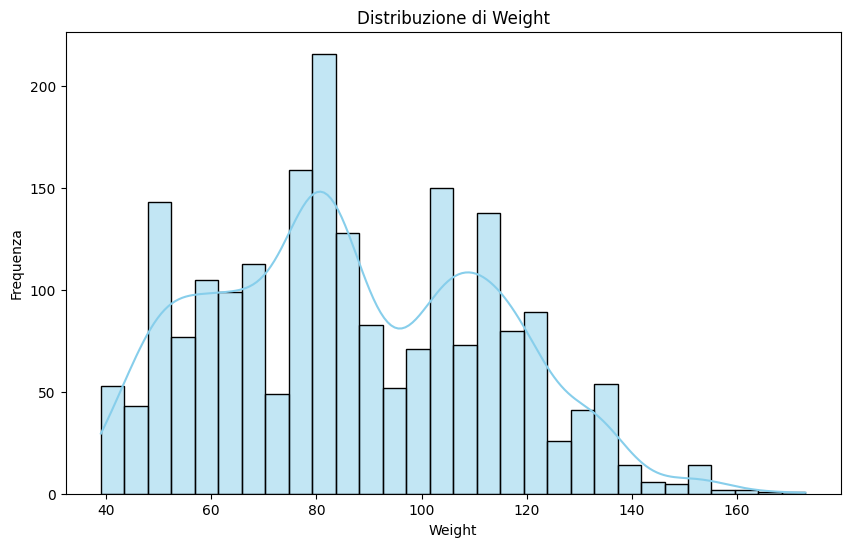

In [ ]:
# Visualizzazione delle distribuzioni delle feature numeriche
for col in cols_numeric:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_for_plotting[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

**Risultati delle Distribuzioni**

Dagli istogrammi e dai KDE plots, possiamo notare:
*   La feature `Weight` mostra una distribuzione leggermente skews verso destra, indicando la presenza di alcuni individui con peso molto elevato.
*   La feature `Height` ha una distribuzione relativamente normale, ma con una piccola skeweness verso sinistra.
*   La feature `Age` mostra una distribuzione uniforme, con una leggera concentrazione negli intervalli di età centrali.


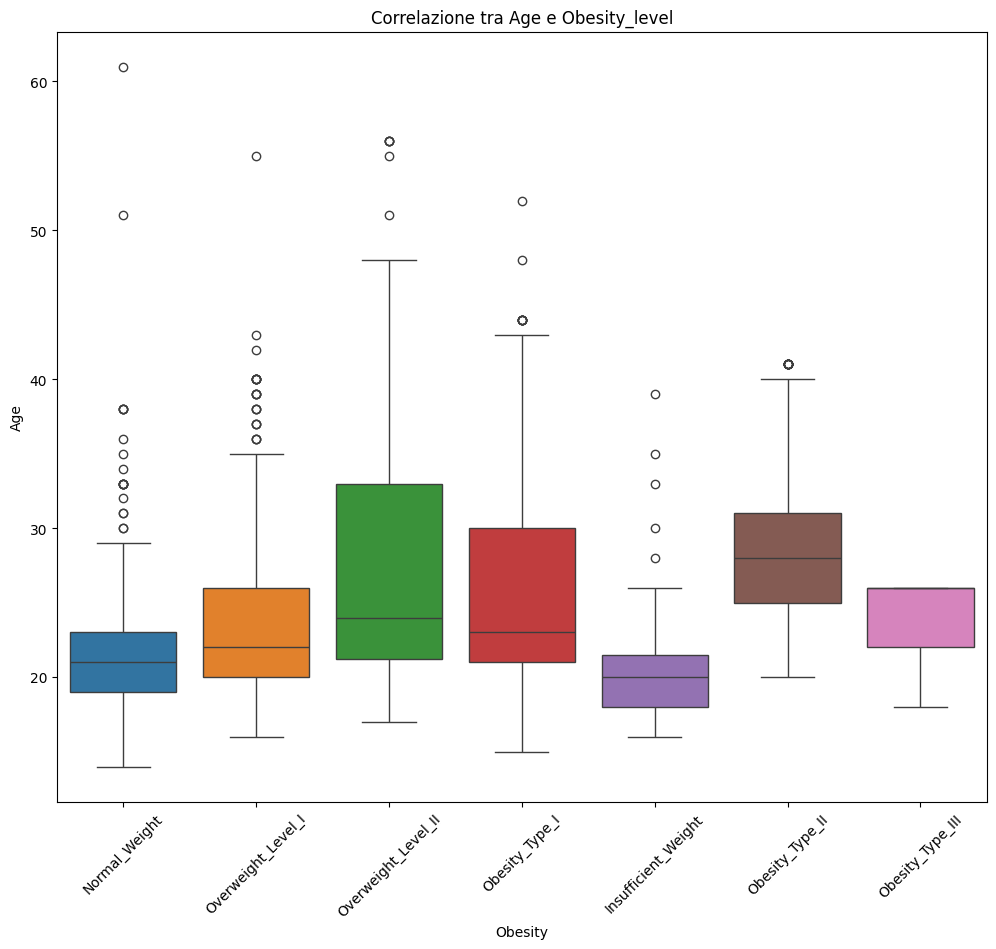

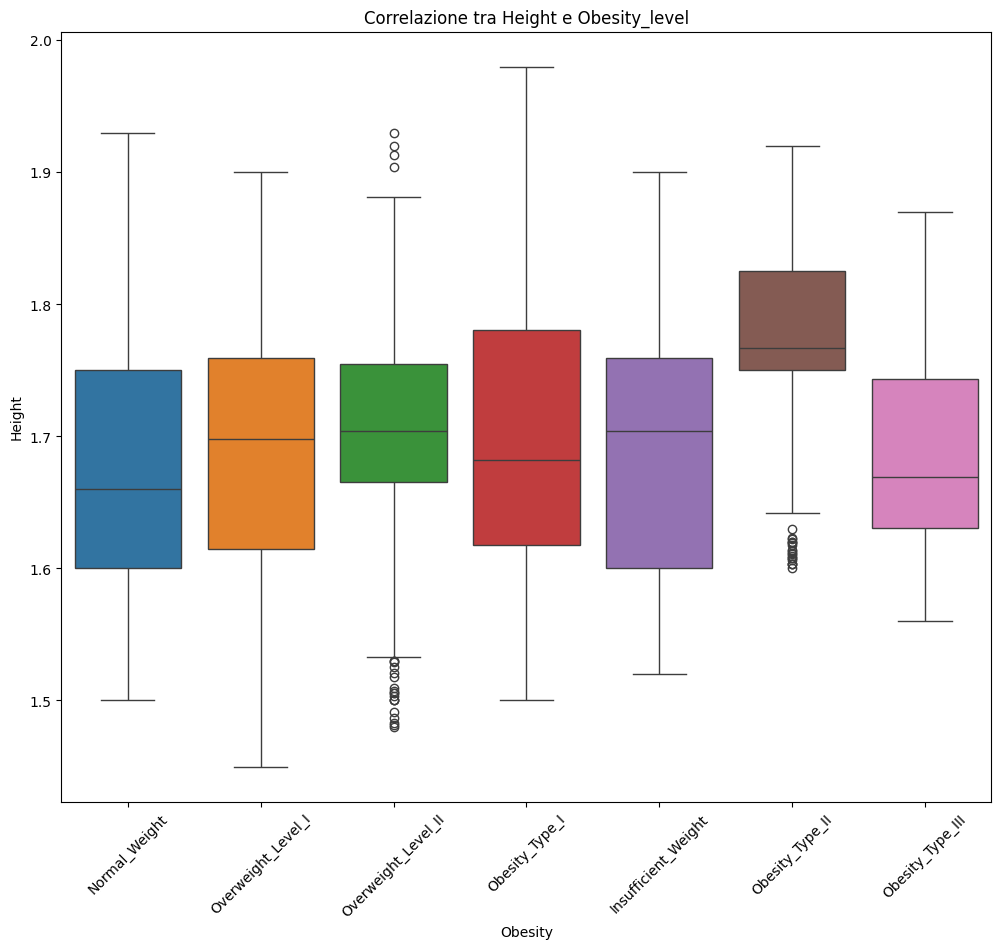

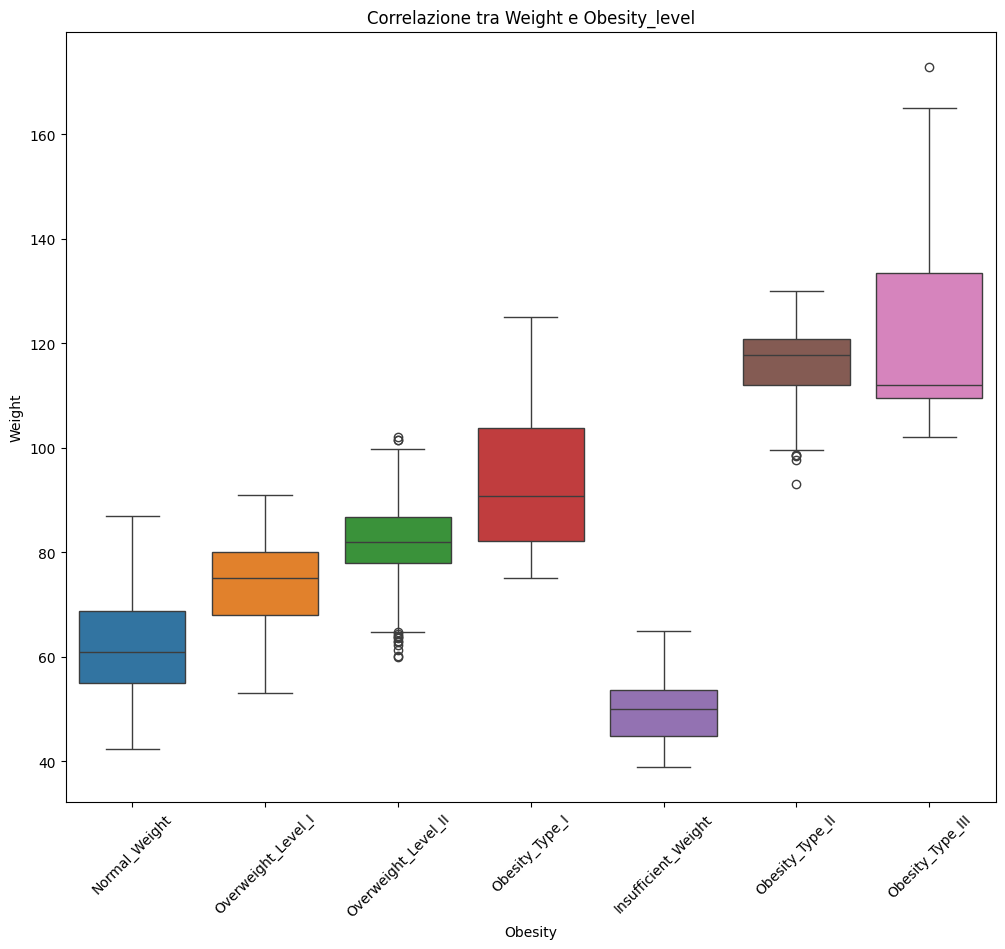

In [ ]:
for col in cols_numeric:
    plt.figure(figsize=(12, 10))
    sns.boxplot(x="Obesity", y=col, data=df_for_plotting, hue="Obesity")
    plt.title(f'Correlazione tra {col} e Obesity_level')
    plt.xticks(rotation=45)
    plt.show()

Osservazioni:
*   con le feature `Age` e `Weight` riusciamo a classficare in maniera relativamente semplice i liveli di obesita
*   con la feature `Height` non si riesscono ad classificare le classi di obesità perchè i bosxplot trai vari livelli di obesità si sovrappongono

**Relazioni tra Feature Numeriche**

Le relazioni tra feature numeriche possono essere analizzate tramite scatter plots o pair plots. Questi grafici ci permettono di vedere se esistono pattern lineari o non lineari tra le variabili.

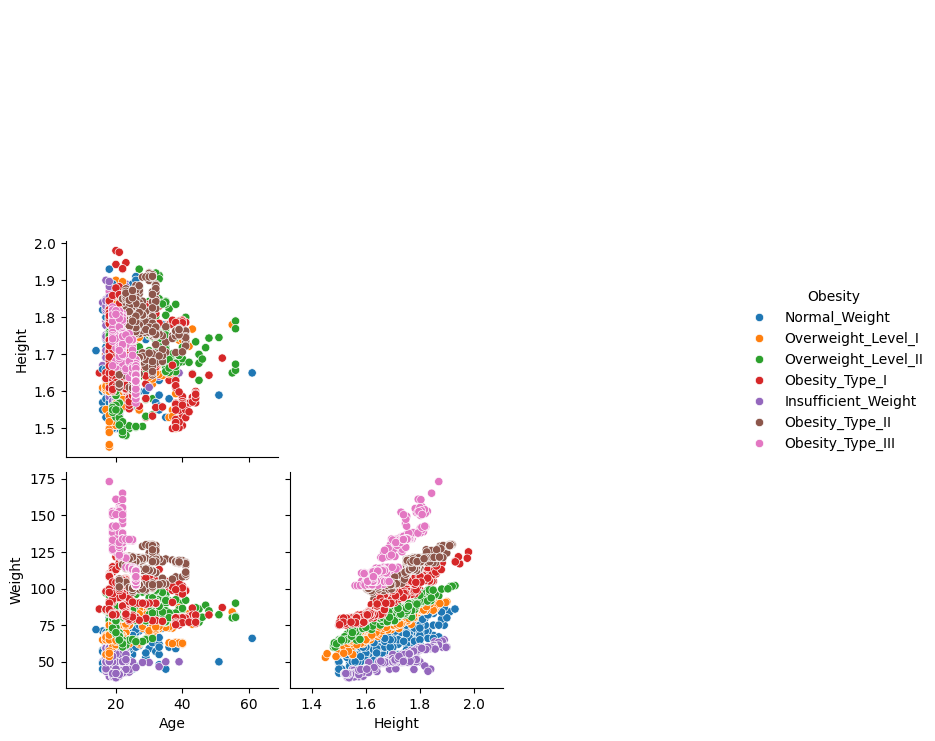

In [ ]:
# Pair Plot per tutte le feature numeriche
cols_numeric = ['Age', 'Height', 'Weight']
g = sns.pairplot(df_for_plotting[cols_numeric + ['Obesity']], hue='Obesity', diag_kind='kde', corner=True, diag_kws={"linewidth": 0, "fill": False})
for i, y_var in enumerate(g.y_vars):
    for j, x_var in enumerate(g.x_vars):
        if x_var == y_var:
            g.axes[i, j].set_visible(False)
plt.show()

**Risultati delle Relazioni tra Feature**

Dal scatter plot tra `Height` e `Weight`, possiamo osservare:
*   Una chiara relazione positiva tra altezza e peso

Il pair plot offre una visione completa delle relazioni tra tutte le feature numeriche:
*   Non sembrano esserci relazioni non lineari particolarmente complesse tra le feature numeriche.

<!-- Ignorare la diagonale di grafici perchè ... -->

## Variabile categoriche

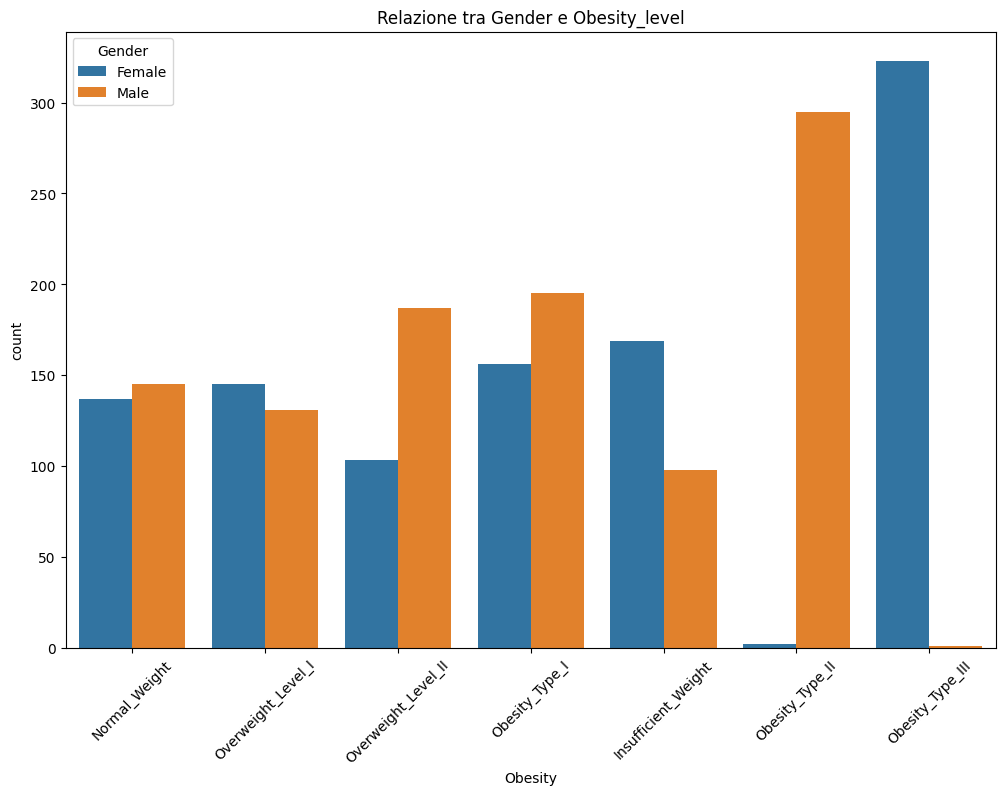

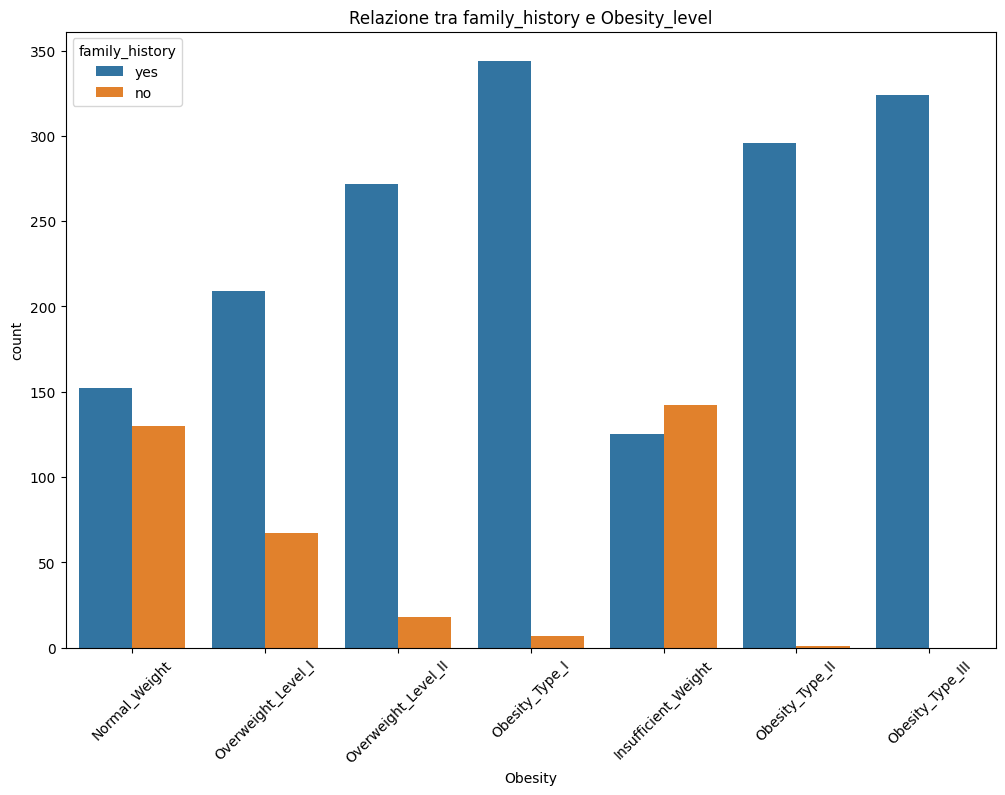

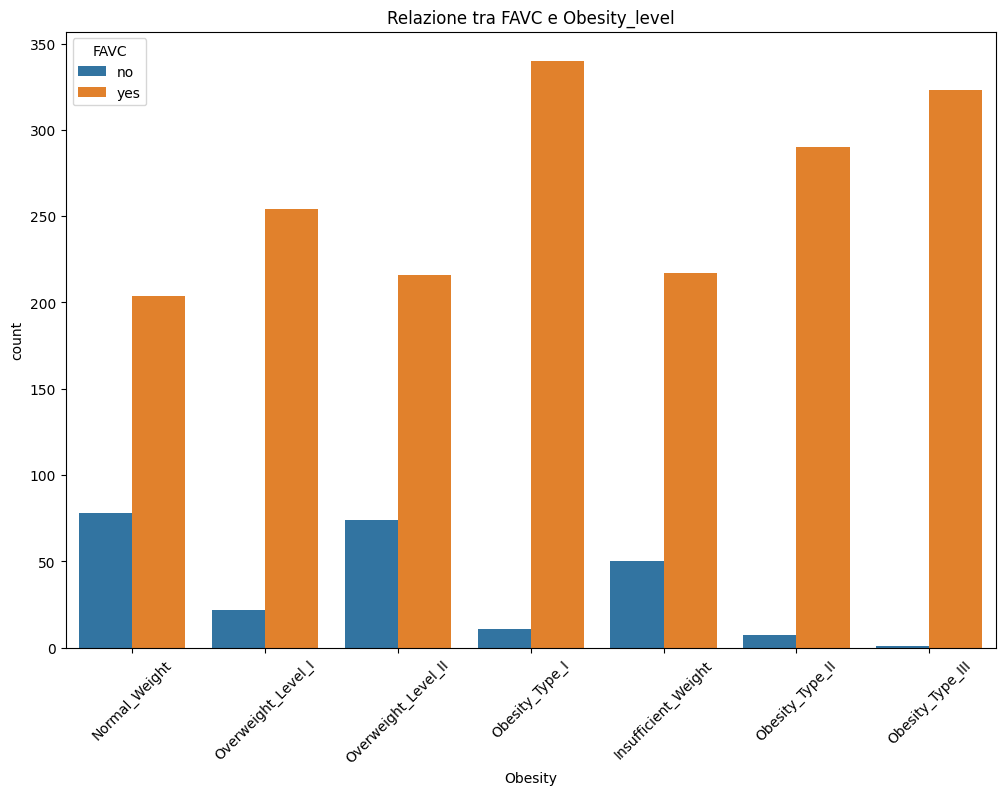

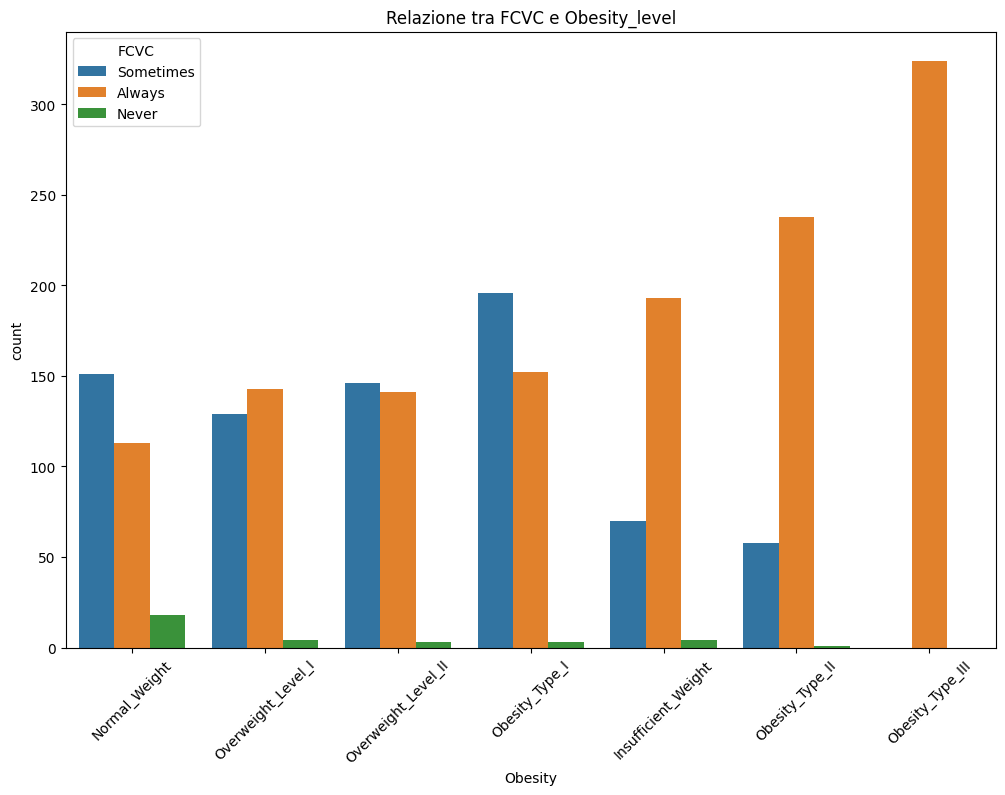

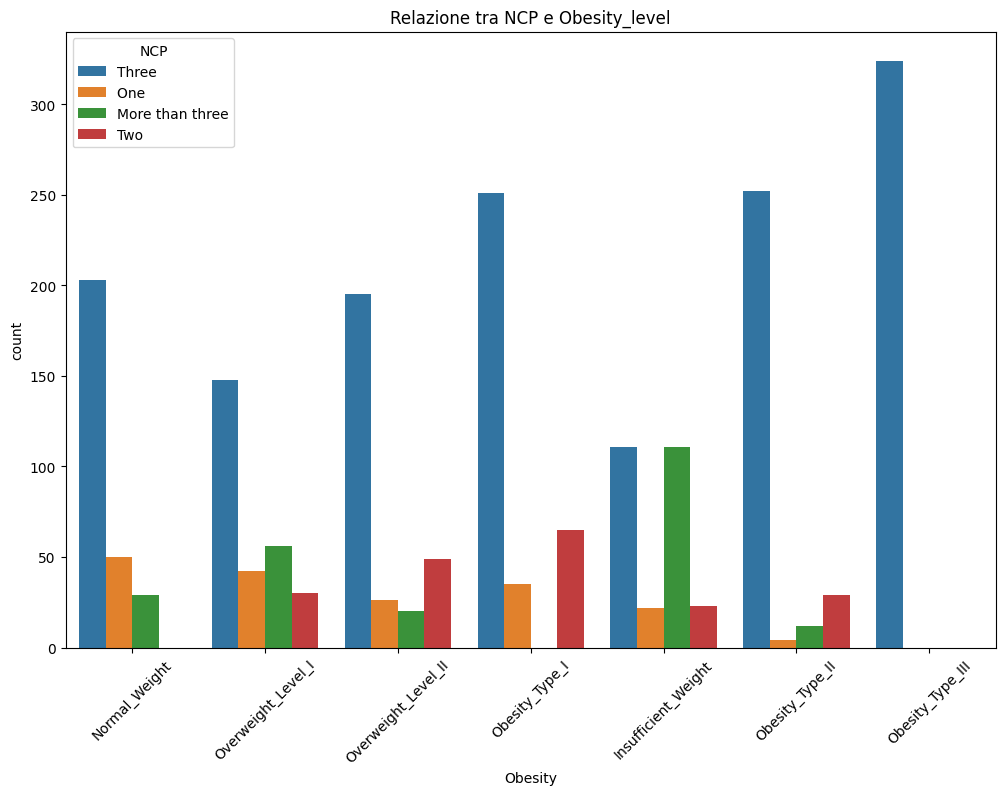

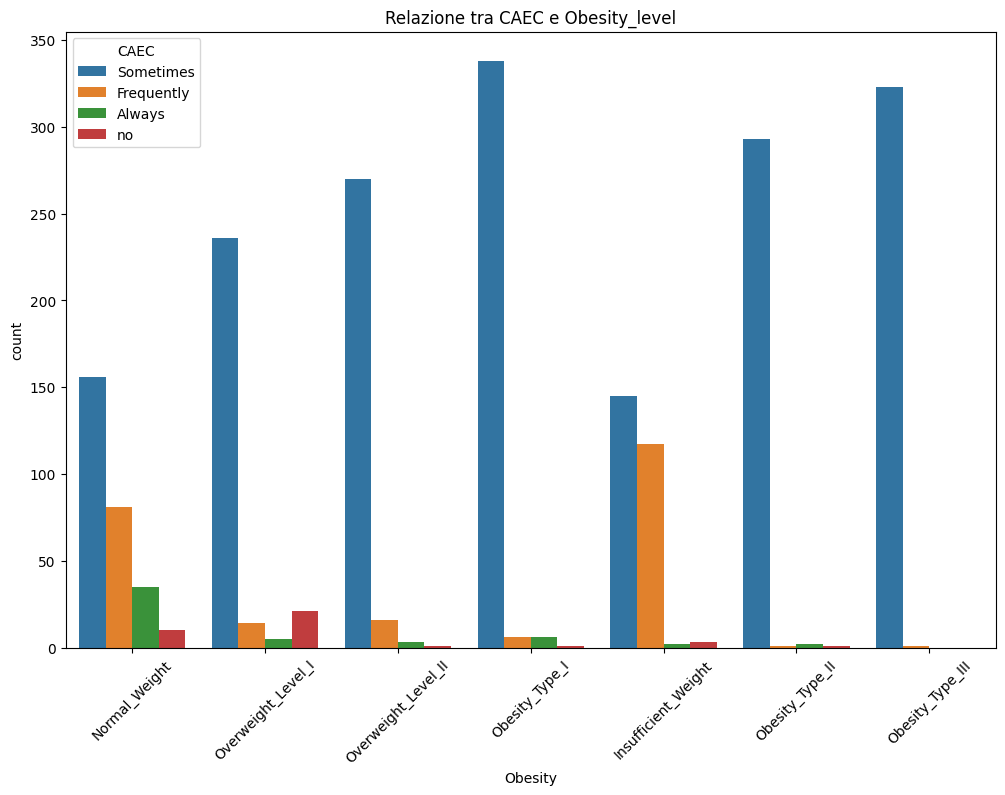

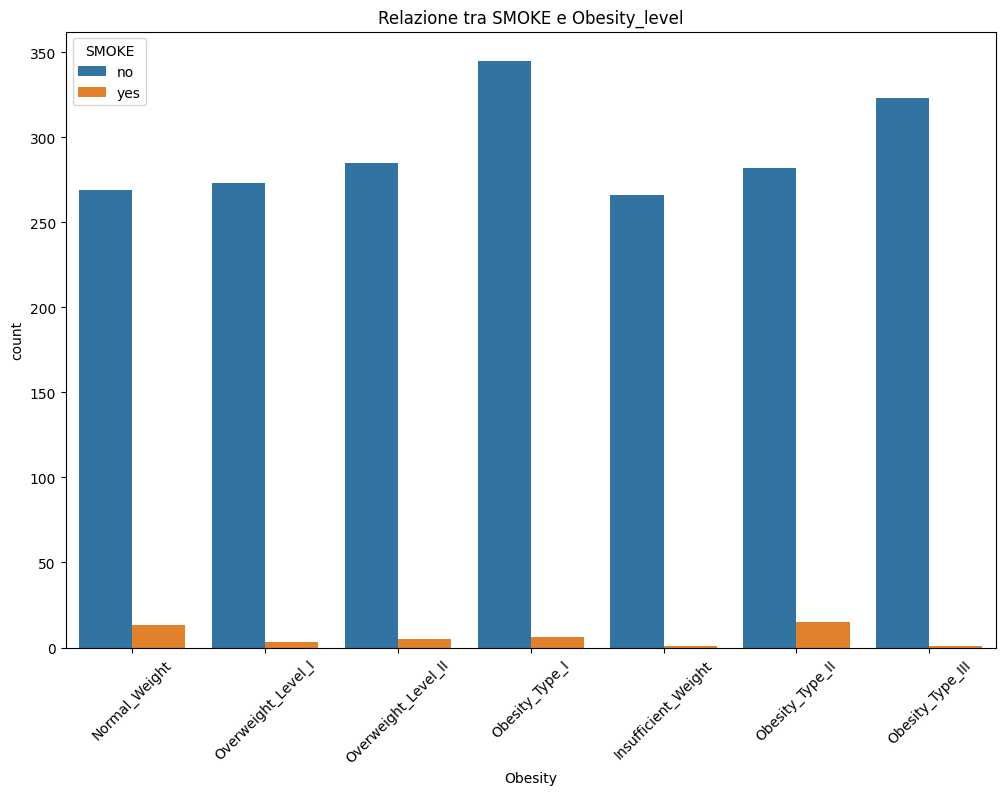

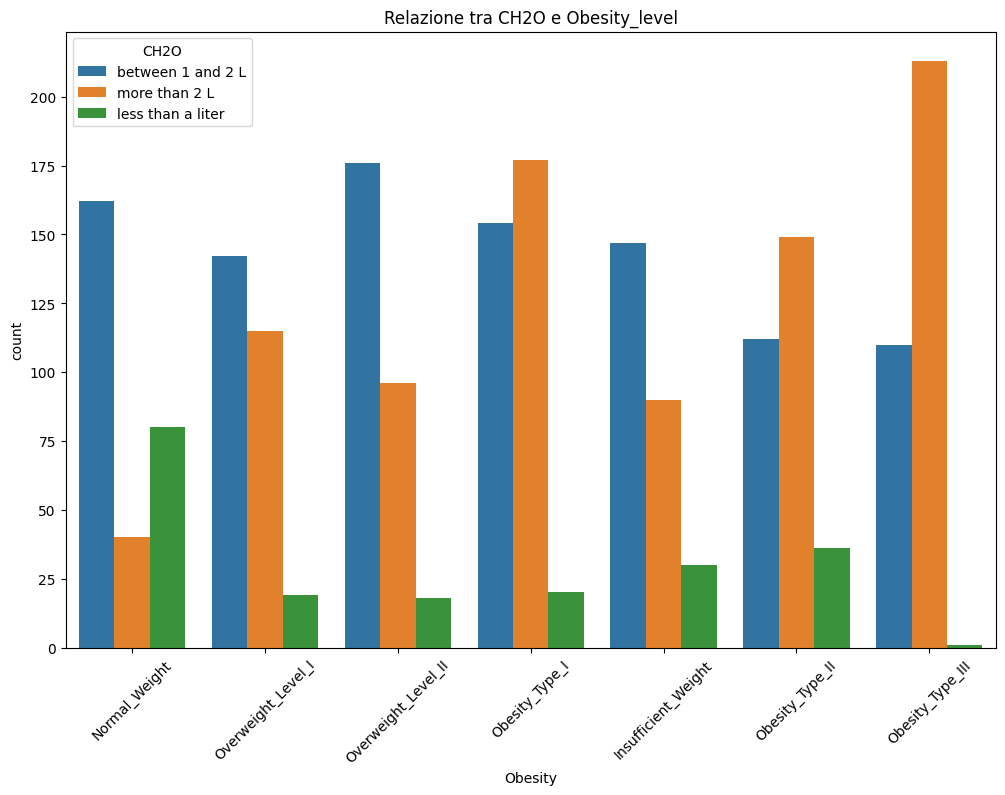

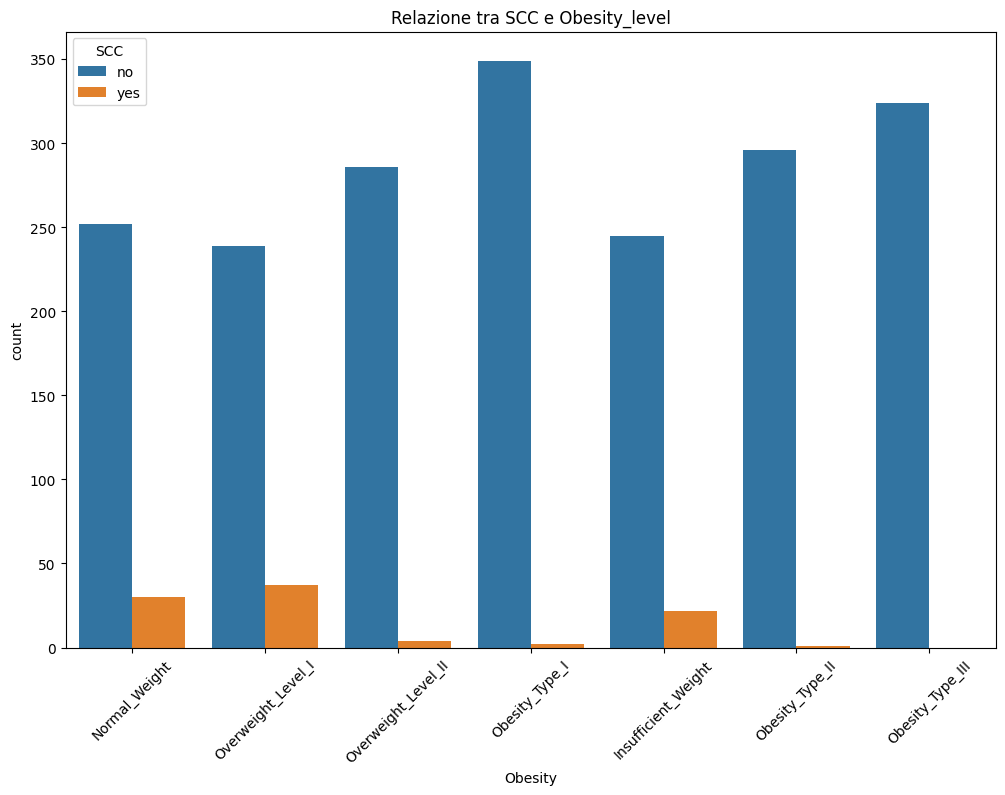

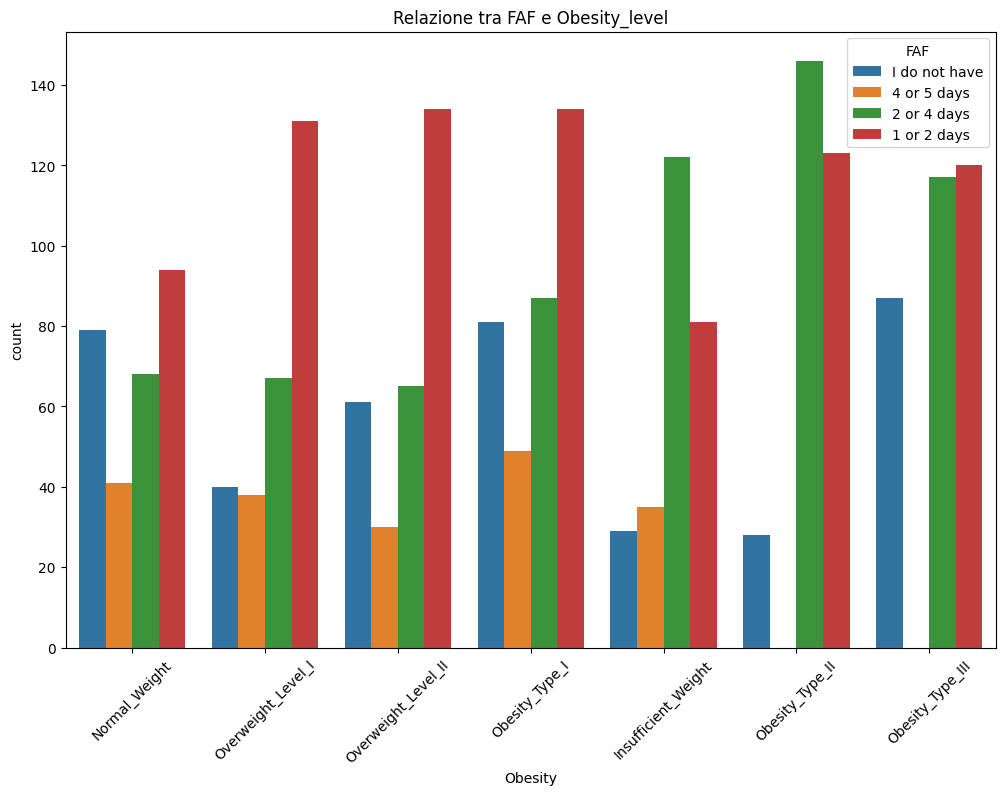

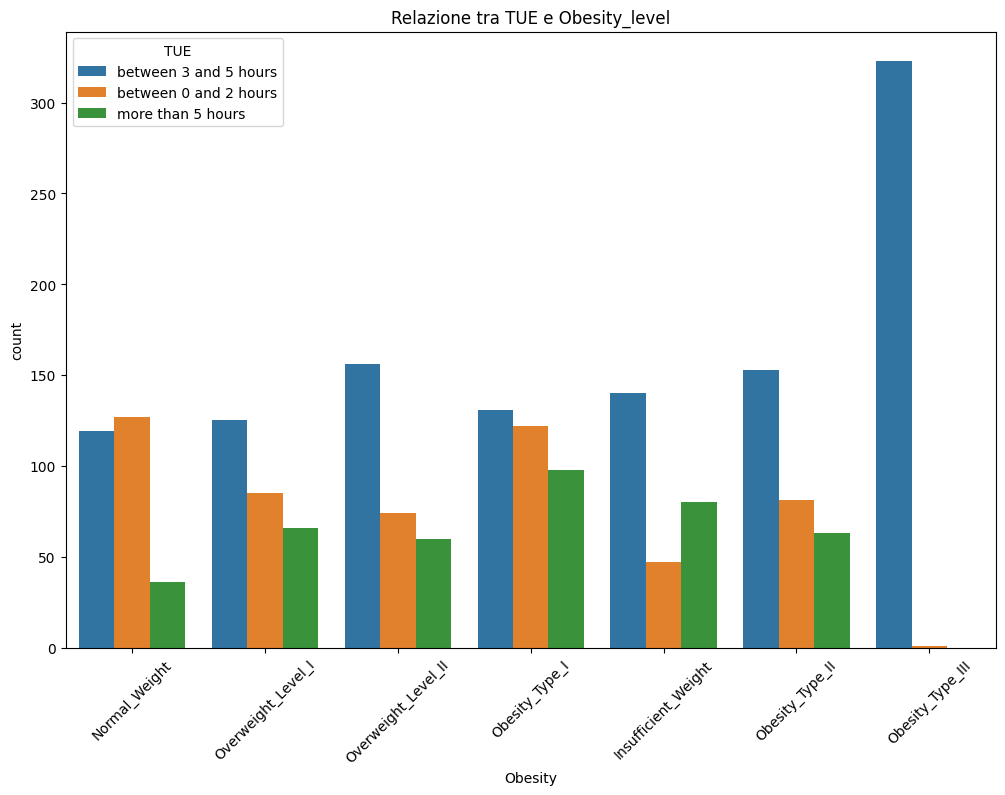

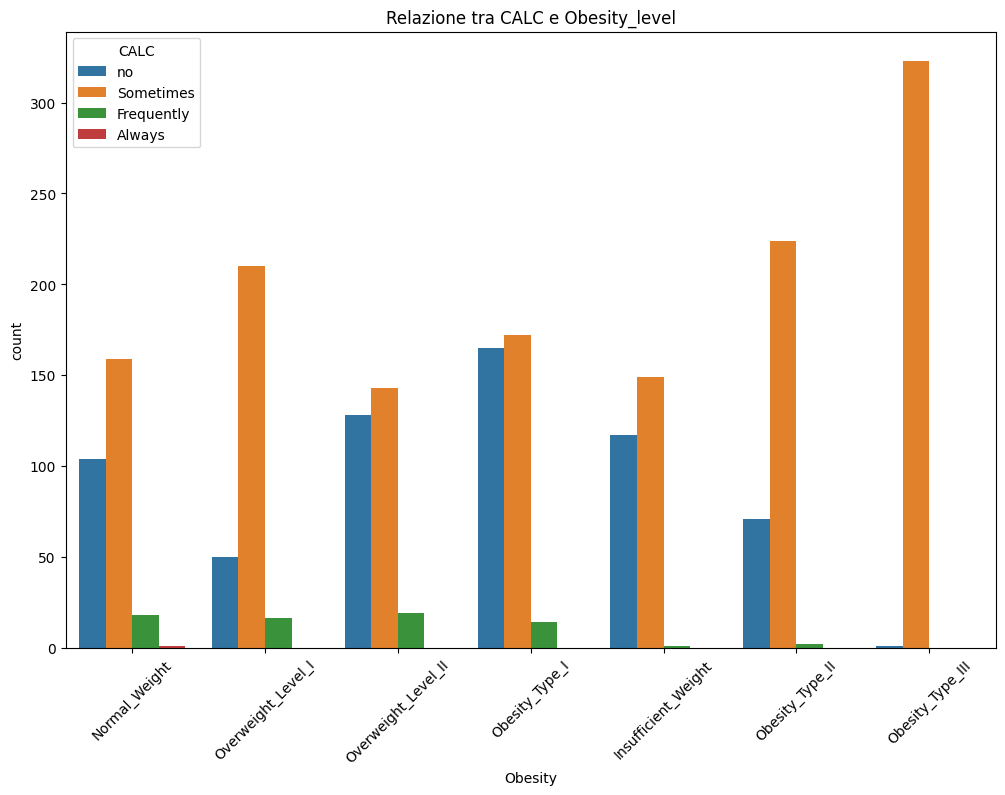

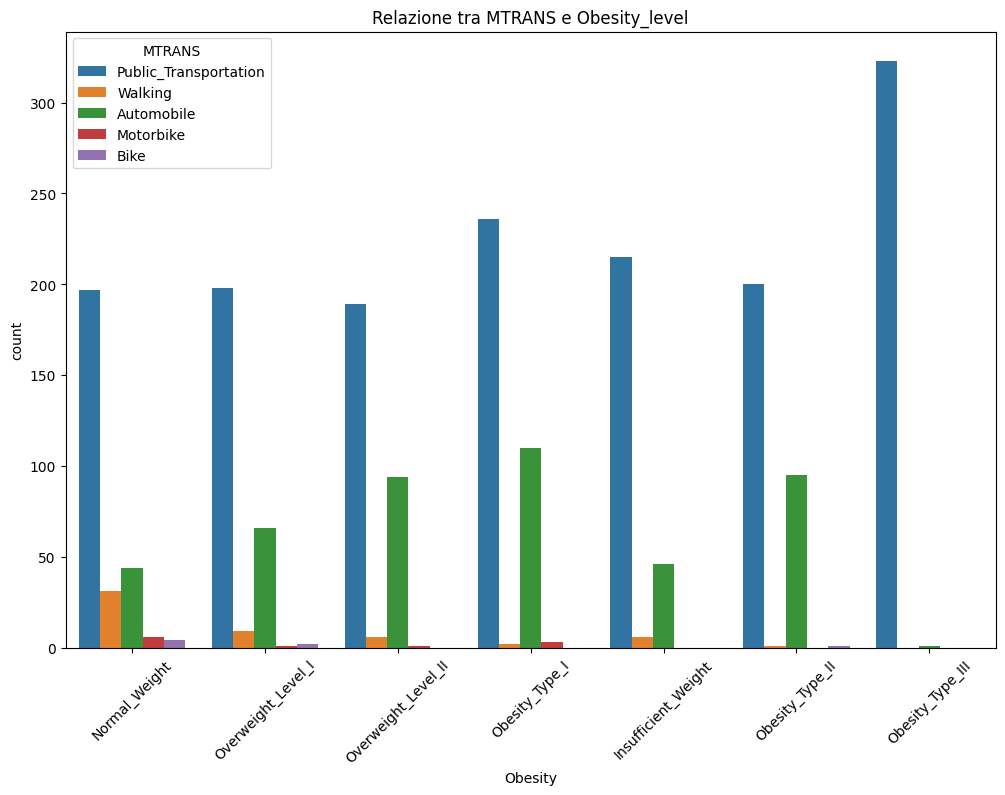

In [ ]:
for col in cols_categorical:
    if col == 'Obesity':
        continue
    plt.figure(figsize=(12, 8))
    sns.countplot(x="Obesity", hue=col, data=df_for_plotting)
    plt.title(f'Relazione tra {col} e Obesity_level')
    plt.xticks(rotation=45)
    plt.show()

**Osservazioni**:
*   Feature che sembrano non avere nessuna correlazione con il livello di obesità:
    *   `Gender`: il livello di obesità è quasi bilanciato tranne per i casi di *Obesity_Type_II* e *Obesity_Type_III* i cui casi si trovano principalmente in quello maschile e femminile rispettivamente;
    *   `SMOKE`: non sembra essere direttamente correlato ai livelli di obesità in questo dataset;
    *   `SCC`: il monitoraggio delle calorie mangiate dall'istogramma sembra che non influisce molto sull'obesità;
    *   `CALC`: il consumo di bevande alcoliche sembra non avere nessuna relazione con l'obesità;
    *   `MTRANS`: usare un mezzo di trasporto rispetto ad un altro non risulta essere importante per il livello di obesità.

*   Feature che sembrano avere correlazioni:
    *   `FAVC`: individui che consumano regolarmente cibi ad alto contenuto calorico sono molto più numerosi nelle categorie di sovrappeso e obesità;
    *   `family_history`: se l'obesità è presente nella storia familiare, è più probabile essere in sovrappeso;
    *   `CAEC`: mangiare tra i pasti frequentemente è correlato a un aumento del numero di individui nelle categorie di obesità.

* Le feature rimanenti (`FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`) non sembrano avere correlazioni dal punto di vista grafico (i grafici si dimostrano per lo più bilanciati in tutti i casi), ma dal punto di vista logico sono fattori estremamente correlati al nostro caso di studio. Come dimostrano i seguenti studi:
  * `FCVC`: La consumazione frequente di verdure comporta una perdita di peso e un rischio minore di obesità ([paper correlato](https://pmc.ncbi.nlm.nih.gov/articles/PMC6266069/#:~:text=Increased%20vegetable%20intake%20was%20also,to%200.88%20in%20other%20studies.));
  * `NCP`: Il numero di pasti principali giornalieri incide sul rischio di obesità, chi consuma più di 3 pasti al giorno ha il 32% di probabilità di avere livelli alti di obesità, rispetto a chi ne consuma meno di 3 ([paper correlato](https://pubmed.ncbi.nlm.nih.gov/38479908/));
  * `CH2O`: La quantità d'acqua bevuta giornalmente è un fattore correlato al controllo del proprio peso, quindi rilevante al rischio di obesità ([paper correlato](https://pmc.ncbi.nlm.nih.gov/articles/PMC11045127/#:~:text=Consistent%20with%20our%20finding%20of,glasses%2Fday%20%5B22%5D.));
  * `FAF`: La frequenza di attività fisica è un fattore importante per il rischio di obesità, si dimostra che gli adulti dovrebbero accumulare circa 60 minuti di attività fisica di intensità moderata al giorno per prevenire l'aumento di peso non salutare. ([paper correlato](https://pmc.ncbi.nlm.nih.gov/articles/PMC3715111/?utm_source=chatgpt.com));
  * `TUE`: Il tempo trascorso nell'uso di dispositivi tecnologici sembra influire sul rischio di obesità, usare dispositivi tra 1 e 3 ore al giorno, aumenta del 40% il rischio di obesità rispetto ad usarli per meno di un'ora. ([paper correlato](https://pmc.ncbi.nlm.nih.gov/articles/PMC9714705/#:~:text=It%20shows%20that%20spending%201,%25%20CI%201.19%2C%201.65));

## Eliminazione delle Feature

Durante l'analisi del dataset, si è osservato che alcune feature non mostrano una correlazione significativa o un impatto diretto con il target. Queste feature possono essere eliminate per semplificare il dataset e migliorare le prestazioni dei modelli.

In [ ]:
# Eliminazione delle feature
df_optimized = df.drop(columns=['Gender', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Visualizzazione delle colonne rimanenti
print("Colonne dopo l'eliminazione:")
display(df_optimized.columns)

df_optimized.head()

Colonne dopo l'eliminazione:


Index(['Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'CH2O', 'FAF', 'TUE', 'Obesity'],
      dtype='object')

Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  CH2O  FAF  TUE  \
0   21    1.62    64.0               1     0     2    3     1     2    0    1   
1   21    1.52    56.0               1     0     3    3     1     3    3    0   
2   23    1.80    77.0               1     0     2    3     1     2    2    1   
3   27    1.80    87.0               0     0     3    3     1     2    2    0   
4   22    1.78    89.8               0     0     2    1     1     2    0    0   

   Obesity  
0        1  
1        1  
2        1  
3        2  
4        3

## Creazione di nuove feature

Basandoci sulla conoscenza del dominio, possiamo creare nuove feature che catturano relazioni nascoste nei dati. Ad esempio:
1. **BMI (Indice di Massa Corporea)**: Un indicatore fondamentale per classificare l'obesità, calcolato come peso diviso l'altezza al quadrato.
2. **Indice di Famiglia e Storia Personale**: La presenza di obesità nella storia familiare (`family_history`) e il consumo di cibi ad alto contenuto calorico (`FAVC`) possono essere combinati per creare un indice che misuri il rischio genetico e comportamentale, quindi la presenza di entrambi i fattori fa aumentare significativamente il rischio di obesità.

In [ ]:
# Creazione della feature BMI
df_optimized['BMI'] = df_optimized['Weight'] / (df_optimized['Height'] ** 2)

# Creazione della feature "Genetic_and_Behavioral_Risk"
df_optimized['Genetic_and_Behavioral_Risk'] = (df_optimized['family_history'] + df_optimized['FAVC']) / 2

cols_numeric = cols_numeric + ['BMI', 'Genetic_and_Behavioral_Risk']

print("Colonne dopo l'aggiunta:")
display(df_optimized.columns)

df_optimized.head()

Colonne dopo l'aggiunta:


Index(['Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'CH2O', 'FAF', 'TUE', 'Obesity', 'BMI',
       'Genetic_and_Behavioral_Risk'],
      dtype='object')

Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  CH2O  FAF  TUE  \
0   21    1.62    64.0               1     0     2    3     1     2    0    1   
1   21    1.52    56.0               1     0     3    3     1     3    3    0   
2   23    1.80    77.0               1     0     2    3     1     2    2    1   
3   27    1.80    87.0               0     0     3    3     1     2    2    0   
4   22    1.78    89.8               0     0     2    1     1     2    0    0   

   Obesity        BMI  Genetic_and_Behavioral_Risk  
0        1  24.386526                          0.5  
1        1  24.238227                          0.5  
2        1  23.765432                          0.5  
3        2  26.851852                          0.0  
4        3  28.342381                          0.0

# Salvataggio del dataset processato

In [ ]:
df_optimized.to_csv('processed_dataset.csv', index=False)

# Apprendimento Supervisionato

L'apprendimento supervisionato è una branca del machine learning in cui un modello viene addestrato su un set di dati etichettati, ovvero dati in cui ogni esempio ha un'etichetta o un valore di output corrispondente. L'obiettivo è quello di imparare una funzione che mappi gli input agli output desiderati. In questo modo, il modello può prevedere l'output per nuovi esempi che non ha mai visto prima.

Nel nostro caso, può essere utilizzato per prevedere il livello di obesità di una persona in base alle sue caratteristiche (età, peso, altezza, abitudini alimentari, ecc.). Il dataset contiene esempi etichettati, in cui ogni esempio rappresenta una persona con le sue caratteristiche e il livello di obesità corrispondente. Il modello verrà addestrato su questo dataset per imparare a prevedere il livello di obesità per nuove persone.

Import necessari per i modelli di apprendimento supervisionato

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, make_scorer, accuracy_score, confusion_matrix
from random import randint

Suddivisione del dataset iniziale in due parti una per l'allenamento dei modelli e l'altra per il testing dei modelli allenati.

Creazioni di funzioni che permettono: di allenare e valutare un modello e di visualizzare informazioni sul moello allenato (tramite il tuning degli iperparmetri) con relative info su livelli di accuratezza.

In [ ]:
x = df_optimized.drop('Obesity', axis=1)
y = df_optimized['Obesity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train dei modelli con tuning degli iperparametri
def train_model(model, param_grid, x_train, y_train, cv_external_folds=5, cv_internal_folds=5, show_info=False, random_state=42):
    overfitting = True
    best_result = None

    scorer = make_scorer(f1_score, average='weighted')
    kf = KFold(n_splits=cv_internal_folds)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring=scorer, n_jobs=-1)

    external_folds = StratifiedShuffleSplit(n_splits=cv_external_folds, test_size=0.2, random_state=random_state)

    for i, (train_index, valid_index) in enumerate(external_folds.split(x_train, y_train)):
        x_train_fold, x_valid_fold = x_train.iloc[train_index], x_train.iloc[valid_index]
        y_train_fold, y_valid_fold = y_train.iloc[train_index], y_train.iloc[valid_index]

        if show_info:
            print(f'[CV EXTERNAL] starting fold {i + 1}/{cv_external_folds}')

        grid_search.fit(x_train_fold, y_train_fold)
        best_score = grid_search.best_score_
        best_params = grid_search.best_params_

        if show_info:
            print(f'[CV INTERNAL] done - best score: {best_score}, best params: {best_params}')

        best_estimator = grid_search.best_estimator_
        valid_score = scorer(best_estimator, x_valid_fold, y_valid_fold)

        if show_info:
            print(f'[CV EXTERNAL] done - score: {valid_score}')

        if valid_score < best_score:
            if best_result is None or valid_score > best_result['validation_score']:
                overfitting = False
                best_result = {
                    'model': best_estimator,
                    'params': best_params,
                    'validation_score': valid_score
                }

    if show_info:
        print('')

    if overfitting:
        raise ValueError('Il modello non è in grado di generalizzare.')

    best_result['random_state'] = random_state

    return best_result

def iterate_training(model, param_grid, x_train, y_train, cv_external_folds=5, cv_internal_folds=5, show_info=False, max_iterations=100):
    for i in range(max_iterations):
        try:
            seed = randint(0, 1000)
            if show_info:
                print(f'Iteration {i + 1}/{max_iterations} - with random state: {seed}')
            result = train_model(model, param_grid, x_train, y_train, cv_external_folds, cv_internal_folds, show_info, random_state=seed)
            break
        except ValueError:
            if i == max_iterations - 1:
                raise ValueError('Il modello non è in grado di generalizzare, con i dati di traing forniti')
            continue

    return result

def print_CV_result(result, model_name):
    print(f"Risultati per il modello {model_name}:")
    print(f"Iperparametri migliori: {result['params']}")
    print(f"Validation Score: {result['validation_score']}")
    print(f"Random State for CV external: {result['random_state']}")

# Valutazione del modello
def evaluate_model(model, x, y):
    y_pred = model.predict(x_test)
    return {
        'report': classification_report(y_test, y_pred),
        'accuracy': balanced_accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Plot della matrice di condusione delle scelte effettuta
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

result_model = {}

## Alberi di Decisione

Gli **alberi di decisione** sono un tipo di algoritmo di apprendimento supervisionato utilizzato sia per la **classificazione** (come nel nostro caso) che per la **regressione**. Sono modelli predittivi che utilizzano una struttura ad albero per rappresentare una serie di decisioni basate su feature (caratteristiche) dei dati, che portano a una **previsione** o a una **classificazione finale**.
La loro struttura prevede:
  1. **Radice**: L'albero inizia con un nodo radice che rappresenta l'intero dataset;
  2. **Nodi interni**: Ogni nodo interno rappresenta una feature (caratteristica) dei dati e si divide in rami in base ai possibili valori di quella feature;
  3. **Rami**: I rami rappresentano le possibili decisioni prese in base al valore della feature nel nodo interno;
  4. **Nodi foglia**: I nodi foglia rappresentano il risultato finale, ovvero la previsione o la classificazione.
  
Infine, il modello è stato valutato tramite le metriche di: **Precision**, **Recall** ed **F1**

Iteration 1/100 - with random state: 448
[CV EXTERNAL] starting fold 1/5
[CV INTERNAL] done - best score: 0.9603969924840996, best params: {'criterion': 'log_loss', 'max_depth': 5, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9493066790318219
[CV EXTERNAL] starting fold 2/5
[CV INTERNAL] done - best score: 0.9672150833569477, best params: {'criterion': 'log_loss', 'max_depth': 10, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9641695342385316
[CV EXTERNAL] starting fold 3/5
[CV INTERNAL] done - best score: 0.9632064713745763, best params: {'criterion': 'log_loss', 'max_depth': 10, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9610778285314648
[CV EXTERNAL] starting fold 4/5
[CV INTERNAL] done - best score: 0.9656163511175231, best params: {'criterion': 'log_loss', 'max_depth': 10, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9730617715845608
[CV EXTERNAL] starting fold 5/5
[CV INTERNAL] done - best score: 0.967844998964684, best params: {'criterion': 'log_loss', 'max_

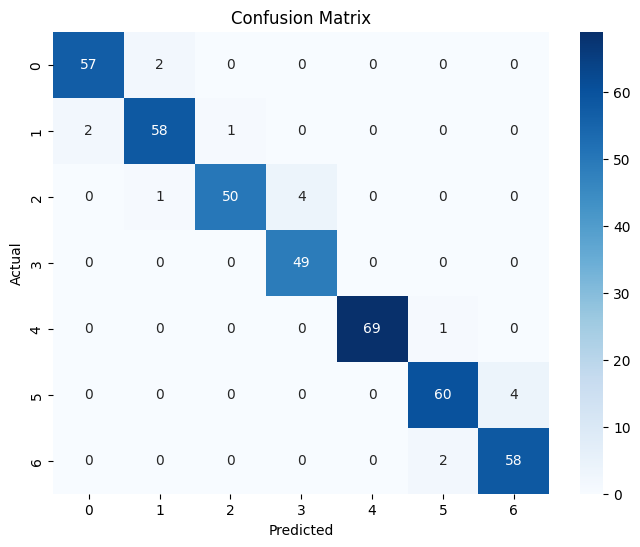

L'albero di decisione assume la seguente forma: 


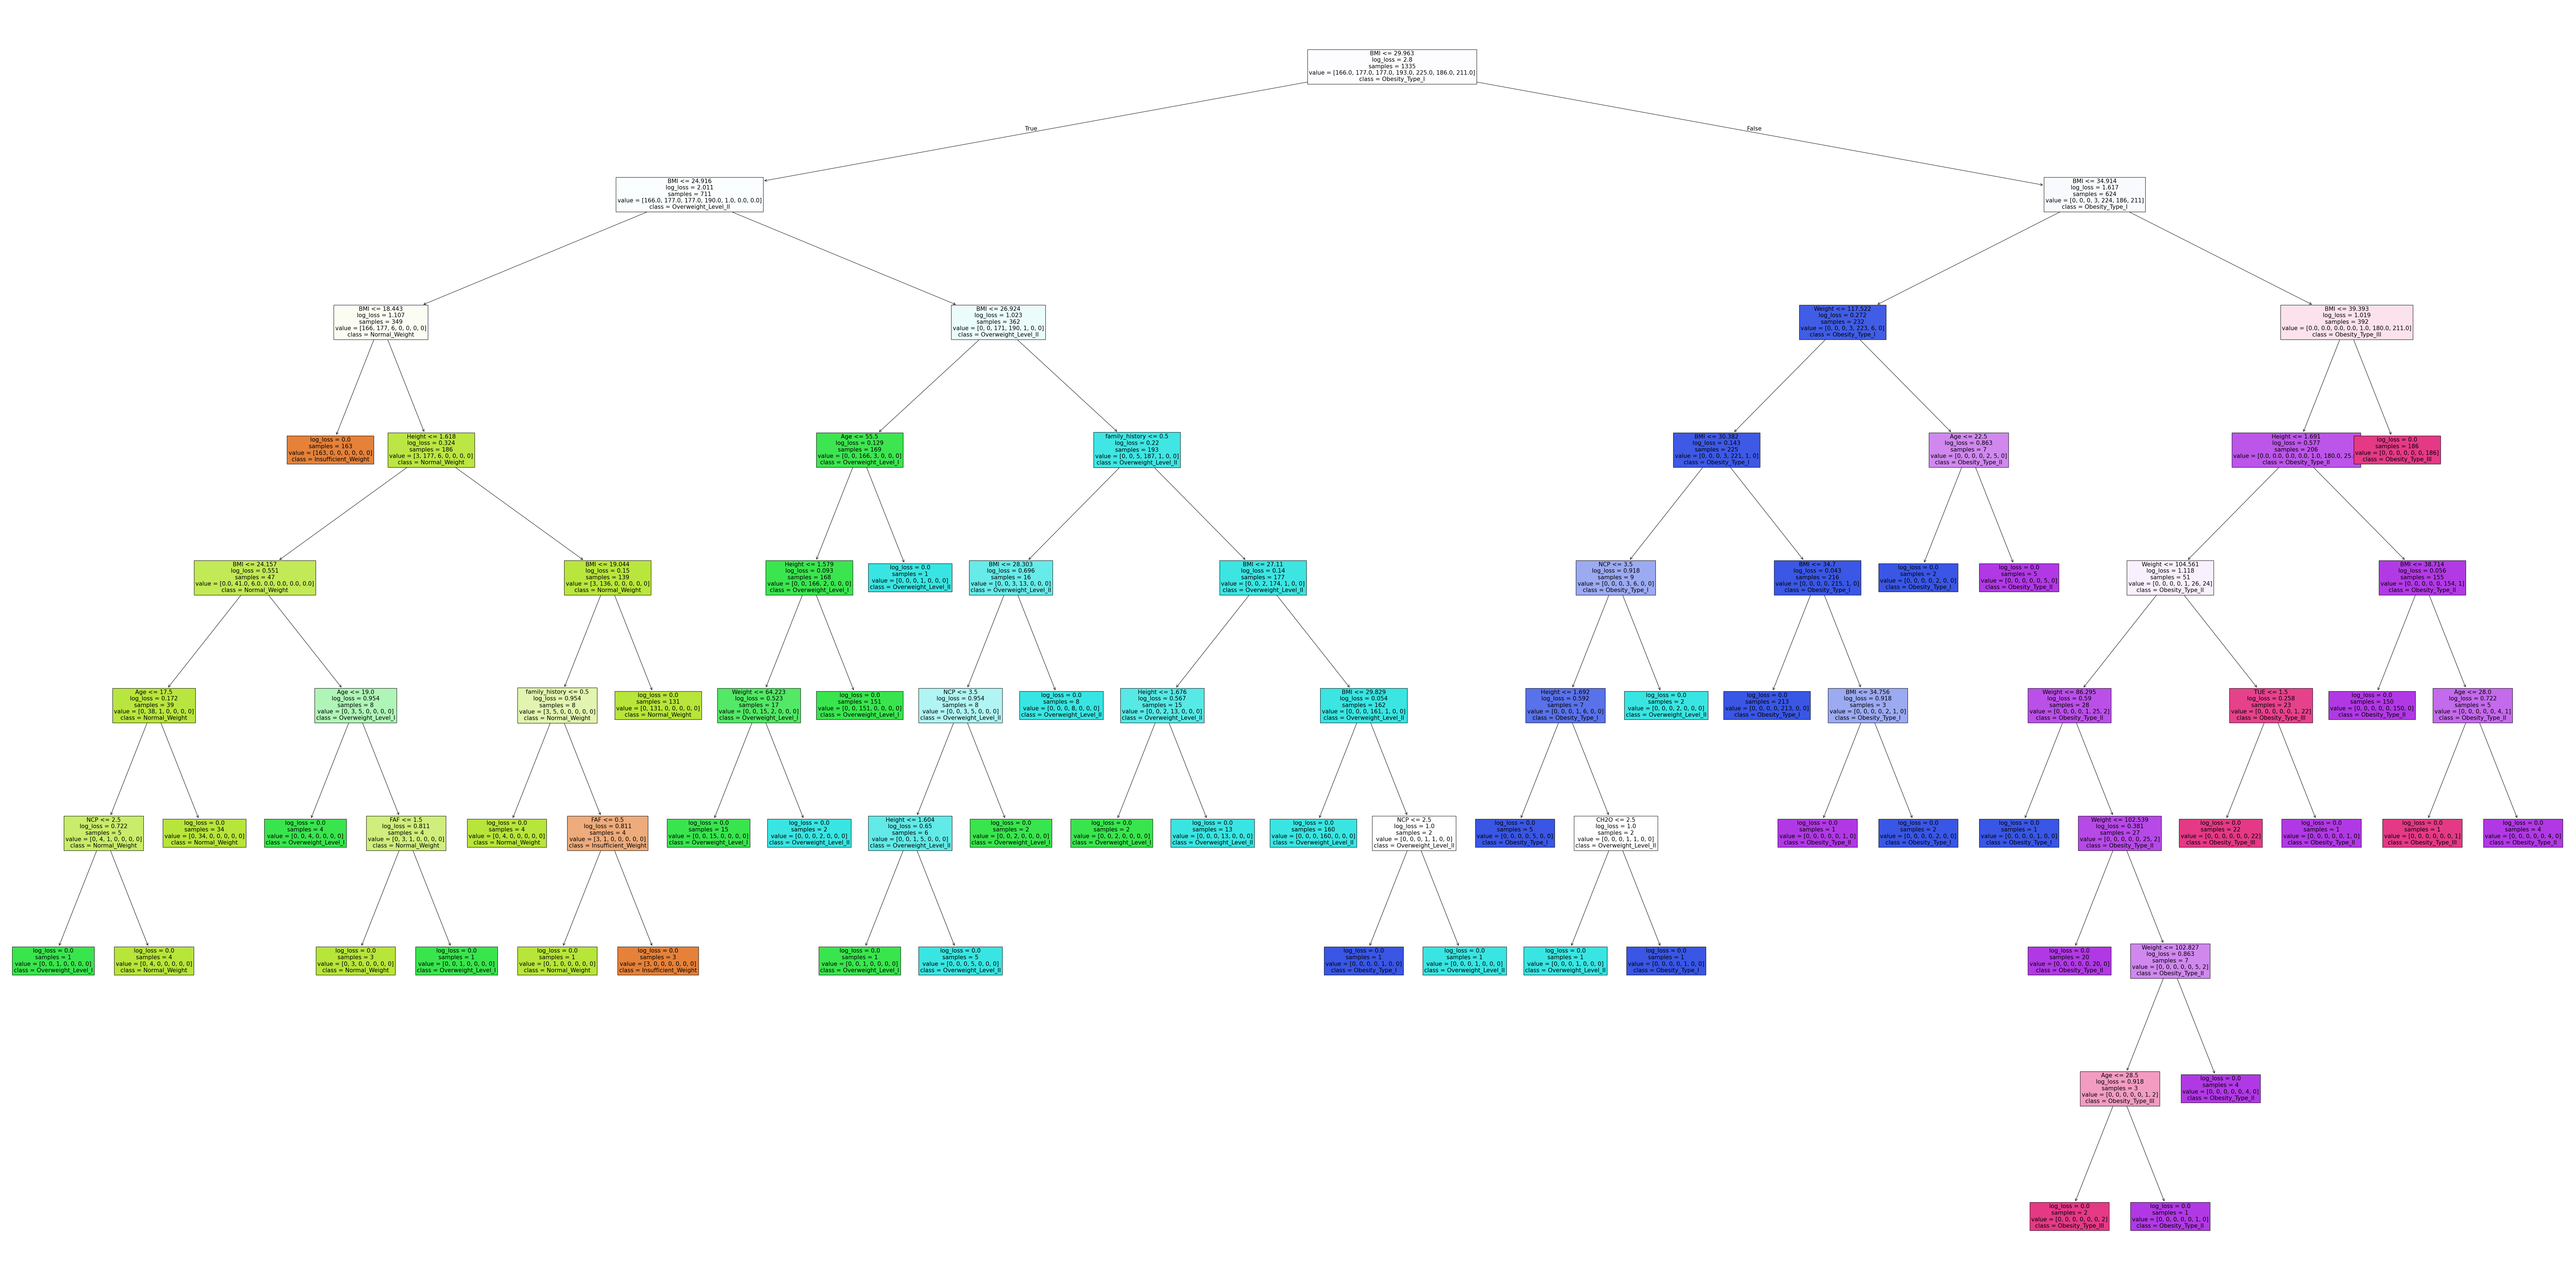

In [ ]:
from sklearn.tree import plot_tree

# Definizione dei parametri per Decision Tree
param_decision_tree = {
    'criterion': ['log_loss', 'entropy'],
    'max_depth': [5, 10, 15],
    'random_state': [42]
}

decision_tree = DecisionTreeClassifier()
try:
    decision_tree_result = iterate_training(decision_tree, param_decision_tree, x_train, y_train, show_info=True)
    print_CV_result(decision_tree_result, 'Decision Tree')

    result_model['DecisionTree'] = evaluate_model(decision_tree_result['model'], x_test, y_test)

    for key, value in result_model['DecisionTree'].items():
        if key != 'confusion_matrix':
            print(f'{key}: {value}')

    plot_confusion_matrix(result_model['DecisionTree']['confusion_matrix'])

    # Stampa Albero di Decisione
    print("L'albero di decisione assume la seguente forma: ")
    plt.figure(figsize=(120, 60))
    plot_tree(decision_tree_result['model'], feature_names = x_train.columns, class_names = label_encoders['Obesity'].inverse_transform([0, 1, 2, 3, 4, 5, 6]), filled=True, fontsize=15)
    plt.show()
except ValueError as e:
    print(e)


## **k-Nearest Neighbourhood**

**k-NN** è un algoritmo di apprendimento automatico supervisionato utilizzato per la **classificazione** (come nel nostro caso) e la **regressione**. È un algoritmo non parametrico basato su istanze, esso non fa ipotesi sulla distribuzione sottostante dei dati e memorizza tutti gli esempi di addestramento per effettuare previsioni.
Il suo funzionamento si può dividere in:
1. **Fase di addestramento**: memorizza semplicemente tutti gli esempi di addestramento con le relative etichette.
2. **Fase di previsione**: quando viene presentato un nuovo esempio, il modello k-NN calcola la distanza tra il nuovo esempio e tutti gli esempi di addestramento.
3. **Selezione dei vicini**: Il modello seleziona i *k* esempi di addestramento più vicini al nuovo esempio.
4. **Previsione**: Per la classificazione, il modello assegna al nuovo esempio l'etichetta più frequente tra i *k* vicini. Per la regressione, il modello prevede il valore medio dell'output tra i *k* vicini.

Nel nostro caso, il k-NN è stato utilizzato per prevedere il livello di obesità di una persona in base alle sue caratteristiche. Il dataset è stato diviso in un set di addestramento e un set di test. Il modello k-NN è stato addestrato sul set di addestramento e valutato sul set di test.

I principali **iperparametri** del k-NN sono:
- **k**: il numero di vicini da considerare.
- **Metrica di distanza**: la funzione utilizzata per calcolare la distanza tra gli esempi.
- **Pesi**: se dare a tutti i vicini lo stesso peso o dare più peso ai vicini più vicini.

Infine, il modello è stato valutato tramite le metriche di: **Precision**, **Recall** ed **F1**

Iteration 1/100 - with random state: 49
[CV EXTERNAL] starting fold 1/5
[CV INTERNAL] done - best score: 0.9362805223347299, best params: {'n_neighbors': 5, 'weights': 'distance'}
[CV EXTERNAL] done - score: 0.948630842308058
[CV EXTERNAL] starting fold 2/5
[CV INTERNAL] done - best score: 0.9391969140403014, best params: {'n_neighbors': 5, 'weights': 'distance'}
[CV EXTERNAL] done - score: 0.9477994633479201
[CV EXTERNAL] starting fold 3/5
[CV INTERNAL] done - best score: 0.932684993893248, best params: {'n_neighbors': 5, 'weights': 'distance'}
[CV EXTERNAL] done - score: 0.9544865121520144
[CV EXTERNAL] starting fold 4/5
[CV INTERNAL] done - best score: 0.9479903840614234, best params: {'n_neighbors': 5, 'weights': 'distance'}
[CV EXTERNAL] done - score: 0.9369562350364835
[CV EXTERNAL] starting fold 5/5
[CV INTERNAL] done - best score: 0.9422067287793535, best params: {'n_neighbors': 5, 'weights': 'distance'}
[CV EXTERNAL] done - score: 0.9442989539462954

Risultati per il modello K

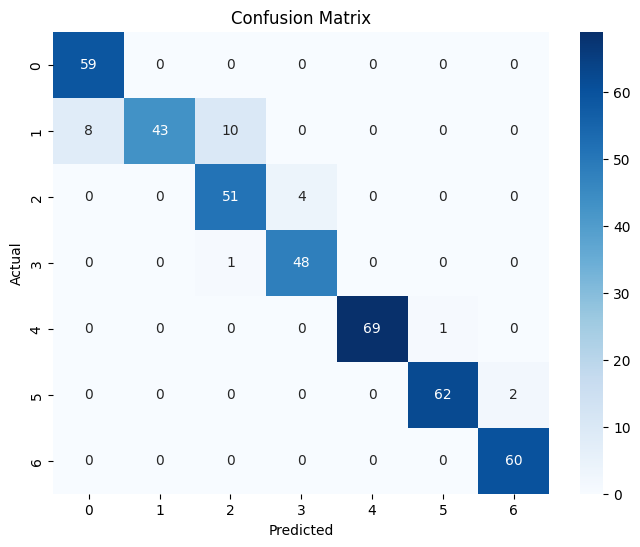

In [ ]:
param_knn = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [5, 7, 10]
}

knn = KNeighborsClassifier()

try:
    knn_result = iterate_training(knn, param_knn, x_train, y_train, show_info=True)

    print_CV_result(knn_result, 'KNN')

    result_model['k-NN'] = evaluate_model(knn_result['model'], x_test, y_test)

    for key, value in result_model['k-NN'].items():
        if key != 'confusion_matrix':
            print(f'{key}: {value}')

    plot_confusion_matrix(result_model['k-NN']['confusion_matrix'])
except ValueError as e:
    print(e)


## Regressione Logistica

La **regressione logistica** è un algoritmo di apprendimento supervisionato utilizzato per la classificazione, è un modello lineare che prevede la probabilità che un esempio appartenga a una determinata classe.
Utilizza una funzione logistica per mappare l'input a un valore compreso tra 0 e 1, che rappresenta la probabilità che l'esempio appartenga a una determinata classe. La funzione logistica è definita come segue:
\begin{align}
\hat{p}(X_i) = \operatorname{expit}(X_i w + w_0) = \frac{1}{1 + \exp(-X_i w - w_0)}
\end{align}

Nel nostro caso, la regressione logistica è stata utilizzata per prevedere il livello di obesità di una persona in base alle sue caratteristiche. Il dataset è stato diviso in un set di addestramento e un set di test. Il modello di regressione logistica è stato addestrato sul set di addestramento e valutato sul set di test.

I principali iperparametri della regressione logistica sono:
- **C**: il parametro di regolarizzazione inversa, impostato a 0.1, 1 e 10.
- **solver**: l'algoritmo utilizzato per ottimizzare i pesi del modello, sono stati utilizati "lbfgs", "newton-cg" e "sag".
Scelti seguendo la tabella:
<table class="table">
  <thead>
    <tr class="row-odd"><th class="head"><p>solver</p></th>
      <th class="head"><p>penalty</p></th>
      <th class="head"><p>multinomial multiclass</p></th>
    </tr>
  </thead>
  <tbody>
    <tr class="row-even"><td><p>‘lbfgs’</p></td>
      <td><p>‘l2’, None</p></td>
      <td><p>yes</p></td>
    </tr>
    <tr class="row-odd"><td><p>‘liblinear’</p></td>
      <td><p>‘l1’, ‘l2’</p></td>
      <td><p>no</p></td>
    </tr>
    <tr class="row-even"><td><p>‘newton-cg’</p></td>
      <td><p>‘l2’, None</p></td>
      <td><p>yes</p></td>
    </tr>
    <tr class="row-odd"><td><p>‘newton-cholesky’</p></td>
      <td><p>‘l2’, None</p></td>
      <td><p>no</p></td>
    </tr>
    <tr class="row-even"><td><p>‘sag’</p></td>
      <td><p>‘l2’, None</p></td>
      <td><p>yes</p></td>
    </tr>
    <tr class="row-odd"><td><p>‘saga’</p></td>
      <td><p>‘elasticnet’, ‘l1’, ‘l2’, None</p></td>
      <td><p>yes</p></td>
    </tr>
  </tbody>
</table>

Il **random state** è stato impostato a <a href = "https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker's_Guide_to_the_Galaxy#The_Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_is_42">42</a>.

Gli iperparametri della regressione logistica sono stati ottimizzati utilizzando la ricerca a griglia con cross-validation a 5 fold, essa ha valutato diverse combinazioni di valori per gli iperparametri e ha selezionato la combinazione che ha prodotto le migliori prestazioni sul set di convalida.

Infine, il modello è stato valutato tramite le metriche di: **Precision**, **Recall** ed **F1**.


Iteration 1/100 - with random state: 976
[CV EXTERNAL] starting fold 1/5
[CV INTERNAL] done - best score: 0.9574819481893456, best params: {'C': 10, 'random_state': 42, 'solver': 'newton-cg'}
[CV EXTERNAL] done - score: 0.9582808497580128
[CV EXTERNAL] starting fold 2/5
[CV INTERNAL] done - best score: 0.9552592303000121, best params: {'C': 10, 'random_state': 42, 'solver': 'newton-cg'}
[CV EXTERNAL] done - score: 0.961056896336465
[CV EXTERNAL] starting fold 3/5
[CV INTERNAL] done - best score: 0.9483993257948719, best params: {'C': 10, 'random_state': 42, 'solver': 'newton-cg'}
[CV EXTERNAL] done - score: 0.95783881516391
[CV EXTERNAL] starting fold 4/5
[CV INTERNAL] done - best score: 0.9581767010338161, best params: {'C': 10, 'random_state': 42, 'solver': 'newton-cg'}
[CV EXTERNAL] done - score: 0.9522793042091308
[CV EXTERNAL] starting fold 5/5
[CV INTERNAL] done - best score: 0.9641069310792855, best params: {'C': 10, 'random_state': 42, 'solver': 'newton-cg'}
[CV EXTERNAL] done 

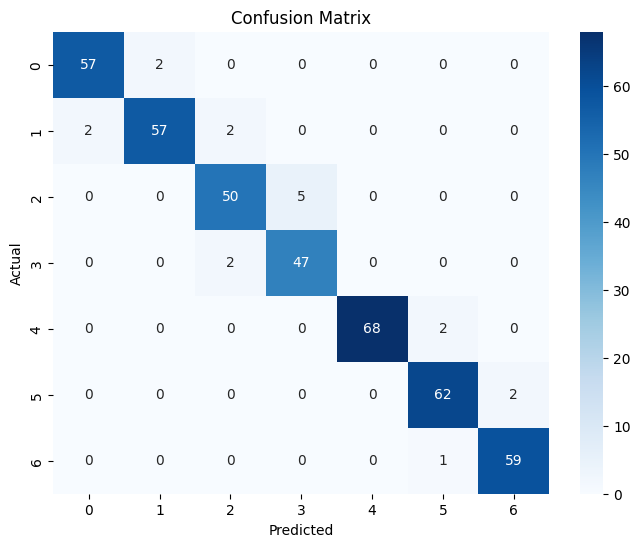

In [ ]:
param_logistic_regression = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'random_state': [42]
}

logistic_regression = LogisticRegression()

try:
    logistic_regression_result = iterate_training(logistic_regression, param_logistic_regression, x_train, y_train, show_info=True)

    print_CV_result(logistic_regression_result, 'Logistic Regression')

    result_model['LogisticRegression'] = evaluate_model(logistic_regression_result['model'], x_test, y_test)

    for key, value in result_model['LogisticRegression'].items():
        if key != 'confusion_matrix':
            print(f'{key}: {value}')

    plot_confusion_matrix(result_model['LogisticRegression']['confusion_matrix'])
except ValueError as e:
    print(e)

## Random Forest

**Random Forest** è un algoritmo di apprendimento automatico supervisionato utilizzato per la classificazione e la regressione, è un metodo di ensemble che combina più alberi decisionali per creare un modello più robusto e preciso.
Il suo funziona si basa sulla costruzione di un insieme di alberi decisionali durante l'addestramento, producendo l'output in base alla classe (classificazione) o alla previsione media (regressione) dei singoli alberi.
Segue le seguenti fasi:
- **Campionamento Bootstrap**: crea più sottoinsiemi di dati dal set di dati originale utilizzando il campionamento con sostituzione.
- **Costruzione di alberi decisionali**: Per ogni sottoinsieme di dati, viene costruito un albero decisionale. Durante la costruzione di ciascun albero, viene selezionato un sottoinsieme casuale di attributi per ogni nodo per determinare la migliore suddivisione.
- **Aggregazione**: aggrega le previsioni di tutti gli alberi decisionali per effettuare la previsione finale. Per la classificazione, la previsione finale è la classe che ottiene il maggior numero di voti dagli alberi. Per la regressione, la previsione finale è la media delle previsioni di tutti gli alberi.

Nel nostro caso, Random Forest è stato utilizzato per prevedere il livello di obesità di una persona in base alle sue caratteristiche. Il dataset è stato diviso in un set di addestramento e un set di test, il modello è stato addestrato sul set di addestramento e valutato sul set di test.

I principali **iperparametri** di Random Forest sono:
- **n_estimators**: il numero di alberi decisionali nella foresta.
- **max_depth**: la profondità massima di ogni albero decisionale.
- **min_samples_split**: il numero minimo di campioni richiesti per dividere un nodo interno.
- **min_samples_leaf**: il numero minimo di campioni richiesti in un nodo foglia.

Iteration 1/100 - with random state: 69
[CV EXTERNAL] starting fold 1/5
[CV INTERNAL] done - best score: 0.9857832876042851, best params: {'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 100, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9880227679605563
[CV EXTERNAL] starting fold 2/5
[CV INTERNAL] done - best score: 0.9828859106722903, best params: {'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9820868064661836
[CV EXTERNAL] starting fold 3/5
[CV INTERNAL] done - best score: 0.9865545434016919, best params: {'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 100, 'random_state': 42}
[CV EXTERNAL] done - score: 0.9940134432519095
[CV EXTERNAL] starting fold 4/5
[CV INTERNAL] done - best score: 0.9902675517453167, best params: {'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 50, 'random_state': 42}
[CV EXTERNAL] done - score: 0.982005226189088
[CV EXTERNAL] starting fold 5/5
[CV INTERNAL] 

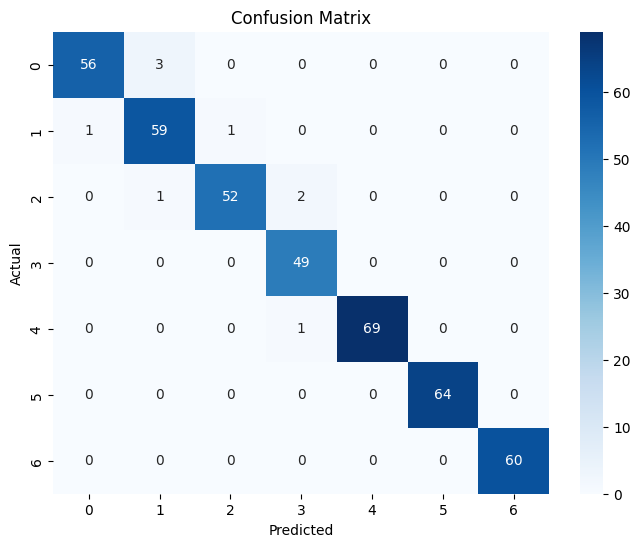

In [ ]:
param_random_forest = {
    'n_estimators': [25, 50, 100],
    'criterion': ['log_loss', 'entropy'],
    'max_depth': [5, 10, 15],
    'random_state': [42]
}

random_forest = RandomForestClassifier()

try:
    random_forest_result = iterate_training(random_forest, param_random_forest, x_train, y_train, show_info=True)

    print_CV_result(random_forest_result, 'Random Forest')

    result_model['RandomForest'] = evaluate_model(random_forest_result['model'], x_test, y_test)

    for key, value in result_model['RandomForest'].items():
        if key != 'confusion_matrix':
            print(f'{key}: {value}')

    plot_confusion_matrix(result_model['RandomForest']['confusion_matrix'])
except ValueError as e:
    print(e)

## Confronto tra i modelli

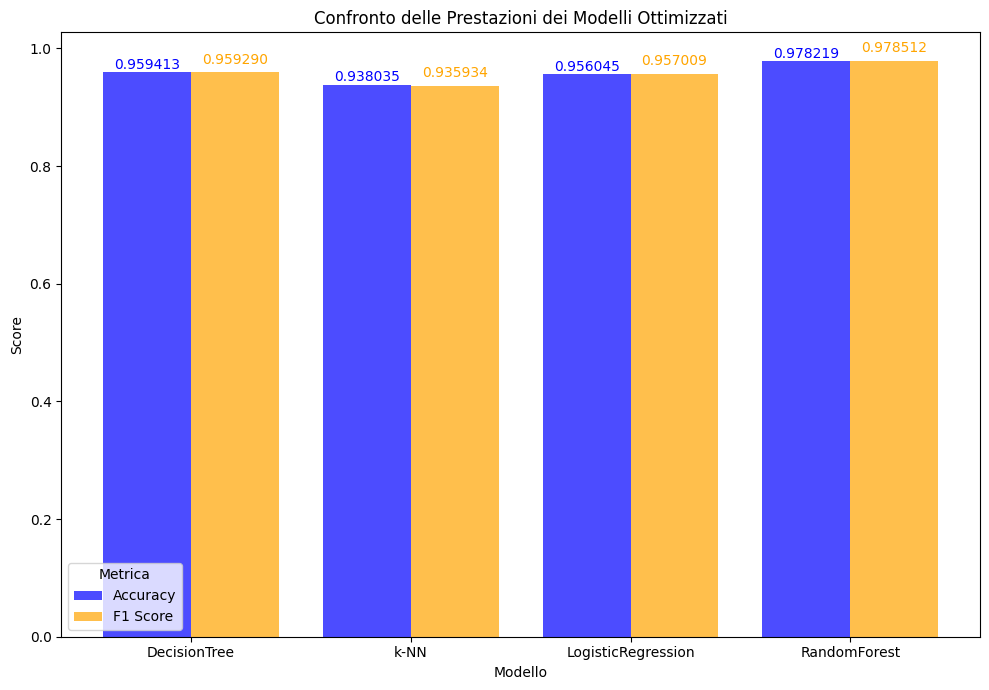

In [ ]:
results_df = pd.DataFrame(result_model).T
plt.figure(figsize=(10, 7))
bar_width = 0.4
index = np.arange(len(results_df))

plt.bar(index, results_df['accuracy'], width=bar_width, label='Accuracy', alpha=0.7, color='blue')
plt.bar(index + bar_width, results_df['f1'], width=bar_width, label='F1 Score', alpha=0.7, color='orange')

for i, value in enumerate(results_df['accuracy']):
    plt.text(i, value + 0.001, f'{value:.6f}', ha='center', va='bottom', color='blue')

for i, value in enumerate(results_df['f1']):
    plt.text(i + bar_width, value + 0.01, f'{value:.6f}', ha='center', va='bottom', color='orange')

plt.title('Confronto delle Prestazioni dei Modelli Ottimizzati')
plt.ylabel('Score')
plt.xlabel('Modello')
plt.xticks(ticks=[p + bar_width / 2  for p in index], labels=[model for model in result_model])
plt.legend(title='Metrica', loc='best')
plt.tight_layout()
plt.show()

**Osservazioni Chiave:**
*   **Ottime performance generali**: Tutti i modelli hanno accuracy e F1 score molto alti (≈ 0.93 - 0.98), indicando una buona capacità di classificazione.  

*   **Random Forest è il migliore**: Ha il punteggio più alto su entrambe le metriche:  
    * Accuracy = **0.9782**  
    * F1 Score = **0.9785**  
        * **Motivo**: la Random Forest tende a performare meglio grazie alla combinazione di più alberi decisionali, riducendo overfitting e aumentando la generalizzazione.  

*   **k-NN la meno performante**: Ha i valori più bassi tra tutti i modelli:  
    * Accuracy = **0.9380**  
    * F1 Score = **0.9359**  
        * **Motivo**: *...*

*   **Logistic Regression e Decision Tree**: Hanno prestazioni leggermente inferiori a Random Forest, ma migliori della k-NN.  


# Salvataggio dei modelli allenati

In [ ]:
import pickle

best_models = {
    "DecisionTree": decision_tree_result,
    "k-NN": knn_result,
    "LogisticRegression": logistic_regression_result,
    "RandomForest": random_forest_result
}

with open('best_models.pickle', 'wb') as file:
    pickle.dump(best_models, file)


# Belief Network


Una **Belief Network**, o più formalmente **Bayesian Network (BN)**, è un modello probabilistico grafico che rappresenta un insieme di variabili e le loro dipendenze condizionali tramite un grafo diretto aciclico (DAG).  
**Struttura di una Bayesian Network**  
Una Bayesian Network è composta da:  
1. **Nodi**: Rappresentano le variabili casuali (discrete o continue).  
2. **Archi diretti**: Indicano relazioni di dipendenza tra le variabili. Se esiste un arco da (X) a (Y), significa che (X) influenza direttamente (Y).  
3. **Distribuzioni di probabilità**: Ogni nodo ha associata una *probabilità condizionata* rispetto ai suoi genitori nel grafo, rappresentata tramite la **Tabella di Probabilità Condizionata (CPT)**.  

**Vantaggi delle Bayesian Networks**  
*   **Gestione dell’incertezza**: Ideali per problemi in cui i dati sono incompleti o rumorosi.  
*   **Ragionamento causale**: Permettono di modellare cause ed effetti.  
*   **Inferenza efficiente**: Possiamo calcolare la probabilità di un evento dato un'evidenza osservata.  
*   **Flessibilità e interpretabilità**: Facili da interpretare rispetto ad altri modelli probabilistici.  

In [ ]:
!pip install pgmpy

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, K2Score, BicScore, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

Discretizzazione delle feature continue:
*   la feature `Age` è stata suddivisa negli intervalli:
\begin{equation}
        [14,20] \quad (20,30] \quad (30,40] \quad (40,50] \quad (50,61]
\end{equation}
*   la feature `Weight` in intervalli secondo la sua deviazione standard e arrotondati per difetto, in quanto la sua distrubuzione si avvicina alla distribuzione normale, ed essi sono (nell'ultimo dato che il max è 173 kg è stato deciso di estendere l'ultima invece di creare un intervallo con pochi valori):
\begin{equation}
        (39,65] \quad (65,91] \quad (91,117] \quad (117,143] \quad (143,173]
\end{equation}
*   la feature `Height` è stata suddivisa negli intervalli:
\begin{equation}
        [1.45,1.54] \quad (1.54,1.63] \quad (1.63,1.72] \quad (1.72,1.81] \quad (1.81,1.90] \quad (1.90,1.99]
\end{equation}
*   la feature `BMI` è stata suddivisa negli intervalli che sonoo presenti sul [paper](https://pmc.ncbi.nlm.nih.gov/articles/PMC6710633/pdf/main.pdf):
\begin{equation}
        [0,18.5] \quad (18.5,24.9] \quad (25,34.9] \quad (35,39.9] \quad (40,60]
\end{equation}

In [ ]:
# Discretizzazione di una colonna specificata
def discretize_column(df, column, bins, labels):
    df[column] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    label_encoders[column] = Encoder()
    df[column] = label_encoders[column].fit_transform(df[column], labels)
    return df

discretize_info = {
    'Age': {
        'bins': [14, 20, 30, 40, 50, 61],
        'labels': ['[14-20]', '(20-30]', '(30-40]', '(40-50]', '(50-61]']
    },
    'Weight': {
        'bins': [39, 65, 91, 117, 143, 173],
        'labels': ['[39-65]', '(65-91]', '(91-117]', '(117-143]', '(143-173]']
    },
    'Height': {
        'bins': [1.45, 1.54, 1.63, 1.72, 1.81, 1.90, 1.99],
        'labels': ['[1.45-1.54]', '(1.54-1.63]', '(1.63-1.72]', '(1.72-1.81]', '(1.81-1.90]', '(1.90-1.99]']
    },
    'BMI': {
        'bins': [0, 18.5, 24.9, 29.9, 34.9, 39.9, 60],
        'labels': ['<=18.5', '18.5-24-9', '25-29.9', '30-34.9', '35-39.9', '>=40']
    }
}

df_belief = df_optimized.copy()
for key, value in discretize_info.items():
    df_belief = discretize_column(df_belief, key, value['bins'], value['labels'])

df_belief.to_csv('data.csv', index=False)
# Visualizzare il dataframe discretizzato
df_belief.head()

Age  Height  Weight  family_history  FAVC  FCVC  NCP  CAEC  CH2O  FAF  TUE  \
0    1       1       0               1     0     2    3     1     2    0    1   
1    1       0       0               1     0     3    3     1     3    3    0   
2    1       3       1               1     0     2    3     1     2    2    1   
3    1       3       1               0     0     3    3     1     2    2    0   
4    1       3       1               0     0     2    1     1     2    0    0   

   Obesity  BMI  Genetic_and_Behavioral_Risk  
0        1    1                          0.5  
1        1    1                          0.5  
2        1    1                          0.5  
3        2    2                          0.0  
4        3    2                          0.0

## Costruzione della Belief Network

In [ ]:
class BeliefNetwork:
    def __init__(self, df):
        self.data_train = df
        self.edges = None
        self.model = None
        self.inference = None

    def learn_structure(self, scoring_method='k2'):
        estimator = HillClimbSearch(self.data_train)
        if scoring_method == 'k2':
            scoring = K2Score(self.data_train)
        elif scoring_method == 'bic':
            scoring = BicScore(self.data_train)
        else:
            raise ValueError("Scoring method not supported. Use 'k2' or 'bic'.")

        structure = estimator.estimate(scoring_method=scoring, max_indegree=7, max_iter=int(1e3), show_progress=True)
        self.edges = structure.edges()

    def set_edges_model(self, edges):
        self.edges = edges

    def learn_parameters(self):
        if self.edges is None:
            print('Apprendimento della struttura')
            self.learn_structure()
        self.model = BayesianNetwork(self.edges)
        self.model.fit(self.data_train, estimator=MaximumLikelihoodEstimator)
        self.inference = VariableElimination(self.model)

    def infer(self, variables, evidence):
        return self.inference.query(variables=variables, evidence=evidence)

    def predict(self, variables, evidence):
        return self.inference.query(variables=variables, evidence=evidence).values.argmax()

    def plot(self, title):
        if self.model is None:
            print('Apprendimento della struttura')
            self.learn_structure()
            print('Apprendimento dei parametri')
            self.learn_parameters()
        G = nx.DiGraph(self.model.edges())

        node_colors = {node: plt.cm.tab20(i) for i, node in enumerate(G.nodes())}

        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G, k=2)

        nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=list(node_colors.values()))

        for node in G.nodes():
            edges = G.out_edges(node)
            nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=[node_colors[node]] * len(edges))

        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

        plt.title(title)
        plt.show()

    def set_accuracy_BN(self, accuracy):
        self.accuracy = accuracy

Costruzione di 3 Belief Network che si distinguono sul come viene appreso il DAG di essa:
*   tramite algoritmo di ricerca `HillClimbSearch`, che è un
algoritmo di ricerca locale per massimizzare una funzione obbiettivo utilizzata per valutare la bontà di una particolare struttura (insieme di dipendenze tra variabili) in una rete bayesiana. Per la creazione della Belief Network sono state decise le segue funzioni obiettivo:
    * `K2Score`  misura utilizzata per valutare la qualità di una struttura di rete bayesiana. Si basa sulla probabilità condizionata dei dati dati una specifica configurazione della rete e incorpora un termine che penalizza la complessità della struttura. Il punteggio favorisce modelli più semplici con meno dipendenze tra variabili, ma premia allo stesso tempo l'accuratezza del modello nel descrivere i dati osservati.
    *  `BICScore` (Bayesian Information Criterion): misura utilizzata per selezionare il modello migliore tra vari modelli concorrenti, bilanciando la bontà dell'adattamento del modello ai dati con la complessità del modello stesso. Più basso è il BIC, migliore è il modello, in quanto penalizza modelli troppo complessi che potrebbero sovradattare ai dati.
*   Struttra scelta da noi dopo aver effettuato una serie di analisi approfondite sul dataset. Le scelte strutturali sono state guidate da osservazioni empiriche riguardo le relazioni tra le variabili, l’intuizione sul dominio del problema e il comportamento dei dati stessi.

  0%|          | 0/1000 [00:00<?, ?it/s]

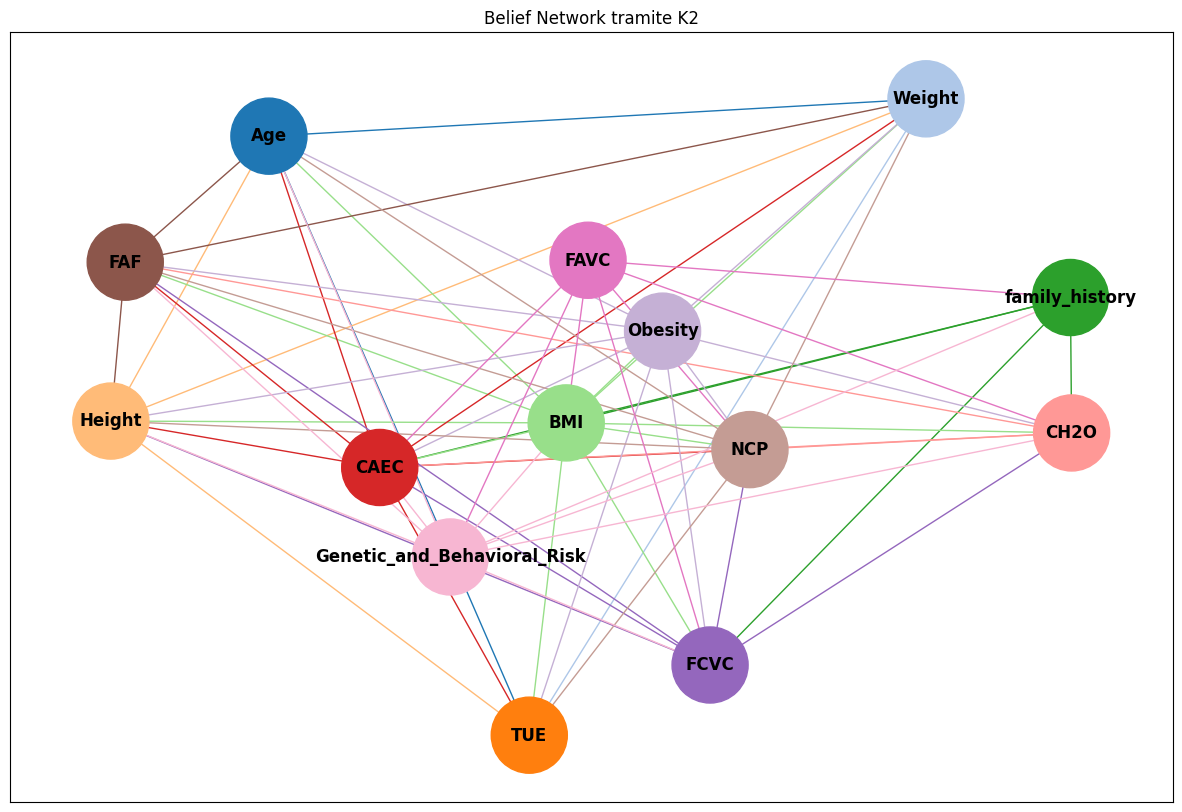

  0%|          | 0/1000 [00:00<?, ?it/s]

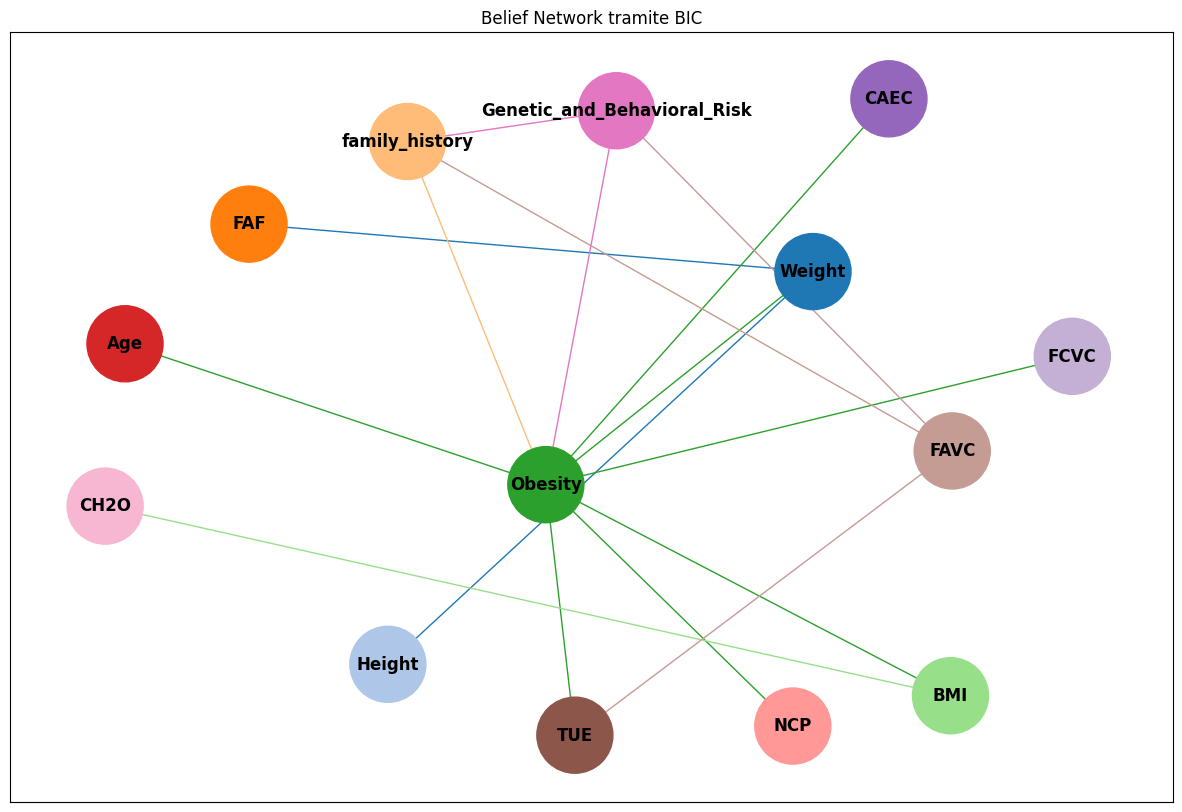

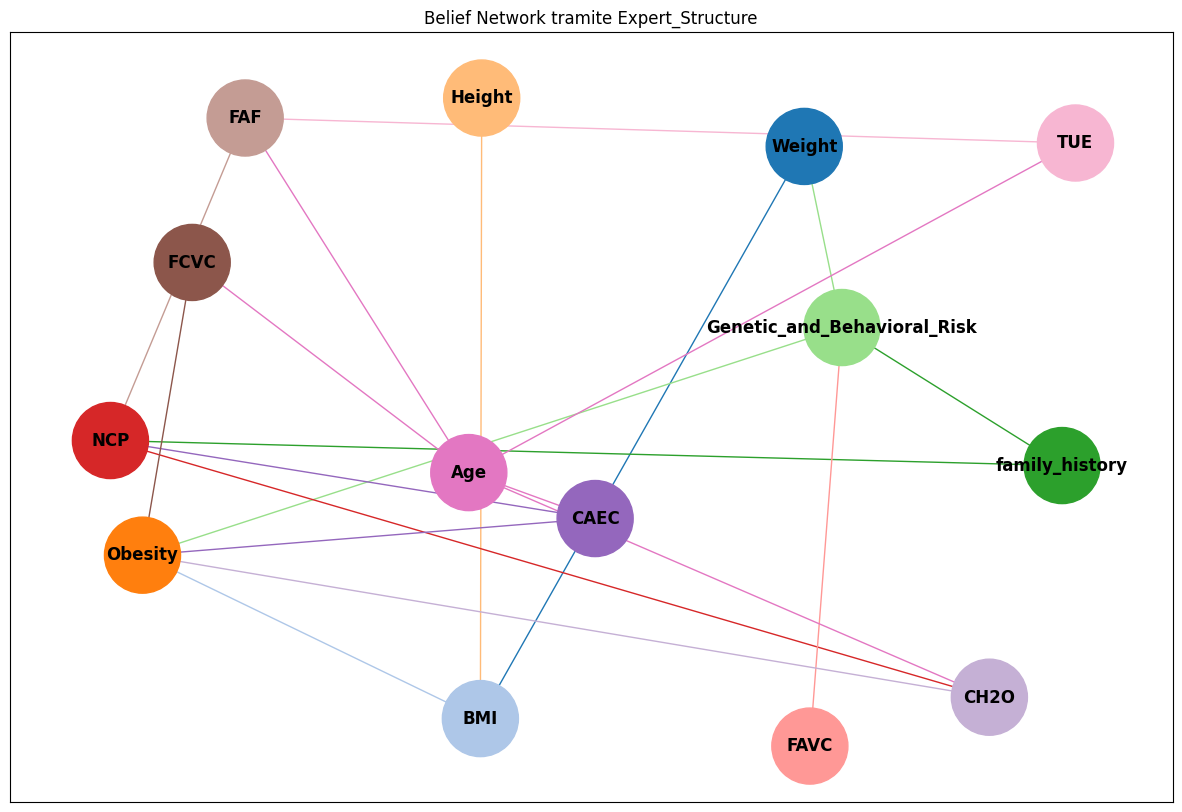

In [ ]:
# Suddivisione del dataset per la costruzione della Belief Network e per il testing di essa
df_train, df_test = train_test_split(df_belief, test_size=0.2, random_state=42)

# Belief network con K2Score
BN_K2 = BeliefNetwork(df_train)
BN_K2.learn_structure()
BN_K2.learn_parameters()
BN_K2.plot("Belief Network tramite K2")

# Belief network con BicScore
BN_BIC = BeliefNetwork(df_train)
BN_BIC.learn_structure(scoring_method='bic')
BN_BIC.learn_parameters()
BN_BIC.plot("Belief Network tramite BIC")

# Belief network con struttura predefinita
BN_EXP = BeliefNetwork(df_train)
expert_structure = [
    ('Weight', 'BMI'),
    ('Height', 'BMI'),
    ('family_history', 'Genetic_and_Behavioral_Risk'),
    ('FAVC', 'Genetic_and_Behavioral_Risk'),
    ('Genetic_and_Behavioral_Risk', 'Weight'),
    ('Genetic_and_Behavioral_Risk', 'Obesity'),
    ('BMI', 'Obesity'),
    ('CAEC', 'Obesity'),
    ('CH2O', 'Obesity'),
    ('FCVC', 'Obesity'),
    ('FAF', 'NCP'),
    ('CAEC', 'NCP'),
    ('family_history', 'NCP'),
    ('Age', 'TUE'),
    ('Age', 'CAEC'),
    ('Age', 'CH2O'),
    ('NCP', 'CH2O'),
    ('TUE', 'FAF'),
    ('Age', 'FAF'),
    ('Age', 'FCVC'),
]
BN_EXP.set_edges_model(expert_structure)
BN_EXP.learn_parameters()
BN_EXP.plot("Belief Network tramite Expert_Structure")


In [ ]:
def evaluate_bn(bn, df_test):
    y_true = df_test['Obesity'].values
    predictions = []

    for _, row in df_test.iterrows():
        evidence = row.drop('Obesity').to_dict()
        pred = bn.predict(['Obesity'], evidence)
        predictions.append(pred)

    acc = accuracy_score(y_true, predictions)
    return acc

# Valutazione su BN_K2
acc_K2 = evaluate_bn(BN_K2, df_test)
print("Accuratezza della Belief Network BN_K2:", acc_K2)
BN_K2.set_accuracy_BN(acc_K2)

# Valutazione su BN_BIC
acc_BIC = evaluate_bn(BN_BIC, df_test)
print("Accuratezza della Belief Network BN_BIC:", acc_BIC)
BN_BIC.set_accuracy_BN(acc_BIC)

# Valutazione su BN_PAR
acc_EXP = evaluate_bn(BN_EXP, df_test)
print("Accuratezza della Belief Network BN_PAR:", acc_EXP)
BN_EXP.set_accuracy_BN(acc_EXP)

/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489: RuntimeWarning: invalid value encountered in divide
  phi.values = phi.values / phi.values.sum()
/usr/local/lib/python3.11/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:489:

Accuratezza della Belief Network BN_K2: 0.6866028708133971
Accuratezza della Belief Network BN_BIC: 0.8971291866028708
Accuratezza della Belief Network BN_PAR: 0.7990430622009569


**Osservazioni e Considerazioni sulle Belief Network**

1.  **BN_K2:**
    - **Struttura Visiva:**
        - La rete appare densamente connessa, con numerosi archi che collegano i nodi.
        - Potrebbe esserci un'elevata complessità nel grafo, suggerendo che molte variabili sono interdipendenti.
        - I nodi come `Obesity`, `BMI`, `family_history`, e altri sembrano avere molteplici connessioni dirette, il che potrebbe indicare una modellazione eccessivamente dettagliata o poco parsimoniosa.
    - **Considerazioni:**
        - L'alta densità di connessioni può portare a un modello che sovra-adatta i dati di addestramento, riducendo la sua capacità di generalizzare su dati nuovi.
        - L'accuratezza relativamente bassa pari a **0.6866** supporta questa ipotesi, suggerendo che la rete potrebbe essere troppo complessa per catturare efficacemente le relazioni sottostanti.
        - Il metodo K2, noto per costruire reti basandosi su un ordinamento dei nodi e una funzione di scoring, potrebbe aver generato una struttura che riflette più il rumore nei dati che le vere dipendenze causali.

2.  **BN_BIC:**
    - **Struttura Visiva:**
        - La rete appare meno densa rispetto a `BN_K2`, con un numero inferiore di archi tra i nodi.
        - Le connessioni sembrano più selettive e mirate, suggerendo una migliore identificazione delle relazioni causali principali.
        - Il nodo `Obesity` è probabilmente centrale, connesso a variabili chiave come `BMI`, `NCP`, `FCVC`, e altre correlate al comportamento e alla genetica.
    - **Considerazioni:**
        - La maggiore accuratezza pari a **0.8971** indica che la rete BIC ha trovato un buon equilibrio tra complessità del modello e capacità predittiva.
        - L'utilizzo del criterio BIC ha probabilmente penalizzato modelli troppo complessi, favorendo una struttura più parsimoniosa che si concentra sulle relazioni più significative.

3.  **BN_EXP:**
    - **Struttura Visiva:**
        - Alcune connessioni sono simili a quelle di `BN_BIC`, ma ci sono anche alcune aree con maggiore densità di archi, suggerendo che alcune relazioni potrebbero essere state modellate in modo più dettagliato.
        - I nodi centrali come `Obesity` e `BMI` sono ancora ben rappresentati, ma potrebbero esserci alcune differenze nelle connessioni secondarie rispetto a `BN_BIC`.

    - **Considerazioni:**
        - L'accuratezza **0.7990** è inferiore a quella di `BN_BIC` ma superiore a quella di `BN_K2`, suggerendo che la rete `BN_EXP` offre una soluzione di compromesso tra complessità e precisione.
        - La struttura visiva riflette questo compromesso, con alcune parti della rete che appaiono più dettagliate rispetto ad altre.


## Inferenza sulla Belief Network

L'**inferenza in una Bayesian Network** consiste nel calcolare la probabilità di una o più variabili di interesse, dato che abbiamo osservato alcune evidenze. In pratica, ci permette di aggiornare le nostre credenze su un evento alla luce di nuove informazioni.

**Tipi di Inferenza**

1. **Inferenza esatta**
 - Usa tecniche come **eliminazione delle variabili** o **propagazione in albero di giunzione**.
 - È fattibile se la rete è di piccole dimensioni o ha una struttura semplice.

2. **Inferenza approssimata**
 - Quando la rete è grande, si usano metodi come il **campionamento Monte Carlo** (es. *Gibbs Sampling*).
 - Fornisce una stima delle probabilità quando il calcolo esatto è troppo costoso.

In sintesi, l'inferenza in una BN ci permette di fare previsioni, diagnosticare cause e prendere decisioni basate su probabilità aggiornate.

---

Riepilogo del mapping eseguito

| **Feature**|**Mapping**|
|-|-|
| Age | [14-20] -> 0, (20-30] -> 1, (30-40] -> 2, (40-50] -> 3, (50-61] -> 4 |
| Weight | [39-65] -> 0, (65-91] -> 1, (91-117] -> 2, (117-143] -> 3, (143-173] -> 4 |
| Height | [1.45-1.54] -> 0, (1.54-1.63] -> 1, (1.63-1.72] -> 2, (1.72-1.81] -> 3, (1.81-1.90] -> 4, (1.90-1.99] -> 5 |
| family_history | no -> 0, yes -> 1 |
| FAVC | no -> 0, yes -> 1 |
| FCVC | Never -> 1, Sometimes -> 2, Always -> 3 |
| NCP | One -> 1, Two -> 2, Three -> 3, More than three -> 4 |
| CAEC | no -> 0, Sometimes -> 1, Frequently -> 2, Always -> 3 |
| CH2O | less than a liter -> 1, between 1 and 2 L -> 2, more than 2 L -> 3 |
| FAF | I do not have -> 0, 1 or 2 days -> 1, 2 or 4 days -> 2, 4 or 5 days -> 3 |
| TUE | between 0 and 2 hours -> 0, between 3 and 5 hours -> 1, more than 5 hours -> 2 |
| Obesity | Insufficient_Weight -> 0, Normal_Weight -> 1, Overweight_Level_I -> 2, Overweight_Level_II -> 3, Obesity_Type_I -> 4, Obesity_Type_II -> 5, Obesity_Type_III -> 6 |
| BMI | <=18.5 -> 0, 18.5-24-9 -> 1, 25-29.9 -> 2, 30-34.9 -> 3, 35-39.9 -> 4, >=40 -> 5 |


In [ ]:
evidence={'FAF':3, 'FCVC':3, 'Weight':1}
result = BN_K2.infer( variables=['Obesity'], evidence=evidence)
print("Secondo la prima Belief Network")
print(result)
print("Livello di obesità possibile: ", label_encoders['Obesity'].inverse_transform(int(result.values.argmax())))

result = BN_BIC.infer( variables=['Obesity'], evidence=evidence)
print("Secondo la seconda Belief Network")
print(result)
print("Livello di obesità possibile: ", label_encoders['Obesity'].inverse_transform(int(result.values.argmax())))

result = BN_EXP.infer( variables=['Obesity'], evidence=evidence)
print("Secondo la terza Belief Network")
print(result)
print("Livello di obesità possibile: ", label_encoders['Obesity'].inverse_transform(int(result.values.argmax())))

Secondo la prima Belief Network
+------------+----------------+
| Obesity    |   phi(Obesity) |
+============+================+
| Obesity(0) |         0.0004 |
+------------+----------------+
| Obesity(1) |         0.1281 |
+------------+----------------+
| Obesity(2) |         0.4457 |
+------------+----------------+
| Obesity(3) |         0.2752 |
+------------+----------------+
| Obesity(4) |         0.1501 |
+------------+----------------+
| Obesity(5) |         0.0002 |
+------------+----------------+
| Obesity(6) |         0.0003 |
+------------+----------------+
Livello di obesità possibile:  Overweight_Level_I
Secondo la seconda Belief Network
+------------+----------------+
| Obesity    |   phi(Obesity) |
+============+================+
| Obesity(0) |         0.0000 |
+------------+----------------+
| Obesity(1) |         0.1209 |
+------------+----------------+
| Obesity(2) |         0.3348 |
+------------+----------------+
| Obesity(3) |         0.3270 |
+------------+------

# Sistema di raccomandazione

In [ ]:
!pip install python-constraint

In [ ]:
from constraint import Problem

def define_csp(family_history, goal_features):
    problem = Problem()

    # Variabili e domini
    variables = ['family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'Obesity']
    domains = {
        'family_history': [family_history],
        'FAVC': [0, 1],
        'FCVC': [1, 2, 3],
        'NCP': [1, 2, 3, 4],
        'CAEC': [0, 1, 2, 3],
        'CH2O': [1, 2, 3],
        'FAF': [0, 1, 2, 3],
        'TUE': [0, 1, 2],
        'Obesity': [0, 1, 2, 3, 4, 5, 6]
    }

    for var in variables:
        problem.addVariable(var, domains[var])

    def constraint_FAVC_FCVC(FAVC, FCVC):
        if FAVC == 1:
            return FCVC in [2, 3]
        return True

    def constraint_NCP_CH2O(NCP, CH2O):
        if NCP in [3, 4]:
            return CH2O > 2
        return CH2O > 1

    def constraint_NCP_CAEC(NCP, CAEC):
        if NCP in [3, 4]:
            return CAEC in [0, 1]
        elif NCP == 1:
            return CAEC in [2, 3]
        return CAEC in [0, 1, 2]

    def constraint_TUE_FAF(TUE, FAF):
        if TUE > 1:
            return FAF >=2
        return True

    def constraint_CAEC_CH2O(CAEC, CH2O):
        if CAEC == 3:
            return CH2O > 2
        return True

    def constraint_FAF_CH2O(FAF, CH2O):
        if FAF in [2, 3]:
            return CH2O > 2
        return True

    def constraint_CAEC_FAVC(CAEC, FAVC):
        if CAEC == 3:
            return FAVC == 0
        return True

    def constraint_family_history_FAF(family_history, FAF):
        if family_history == 1:
            return FAF >= 2
        return True

    def constrainf_NCP(NCP):
        return NCP > 1

    problem.addConstraint(constraint_FAVC_FCVC, ['FAVC', 'FCVC'])
    problem.addConstraint(constraint_CAEC_FAVC, ['CAEC', 'FAVC'])
    problem.addConstraint(constraint_FAF_CH2O, ['FAF', 'CH2O'])
    problem.addConstraint(constraint_NCP_CAEC, ['NCP', 'CAEC'])
    problem.addConstraint(constraint_NCP_CH2O, ['NCP', 'CH2O'])
    problem.addConstraint(constraint_TUE_FAF, ['TUE', 'FAF'])
    problem.addConstraint(constraint_CAEC_CH2O, ['CAEC', 'CH2O'])
    problem.addConstraint(constraint_family_history_FAF, ['family_history', 'FAF'])
    problem.addConstraint(constrainf_NCP, ['NCP'])

    # Aggiungi vincoli per raggiungere lo stato obiettivo
    problem.addConstraint(lambda Obesity: Obesity == 1, ['Obesity'])
    return problem

def solve_csp(problem):
    return problem.getSolutions()

def generate_report(features):
    return "\n".join([f" - Si consiglia per {feature}: {label_encoders[feature].inverse_transform([val])[0]}" for feature, val in features.items()])

family_history = 1
goal_features = 1


bn = BN_BIC

problem = define_csp(family_history, goal_features)
solutions = solve_csp(problem)
if solutions:
    best_solutions = sorted(solutions, key=lambda sol: bn.infer(variables=['Obesity'], evidence={k: v for k, v in sol.items() if k != 'Obesity'}).values[goal_features], reverse=True)
    selected_solutions = []
    for sol in best_solutions:
        if not selected_solutions or all(abs(bn.infer(variables=['Obesity'], evidence={k: v for k, v in sol.items() if k != 'Obesity'}).values[goal_features] - bn.infer(variables=['Obesity'], evidence={k: v for k, v in s.items() if k != 'Obesity'}).values[goal_features]) >= 0.0001 for s in selected_solutions):
            selected_solutions.append(sol)
        if len(selected_solutions) == 5:
            break

    # Stampa delle 5 migliori assegnazioni
    for i, solution in enumerate(selected_solutions, 1):
        print(f"Assegnazione n.ro {i}:")
        solution.pop('Obesity')
        probability = bn.infer(variables=['Obesity'], evidence=solution).values[goal_features]
        solution.pop('family_history')
        print(f"Probabilità di essere nel livello di obesità {label_encoders['Obesity'].inverse_transform([goal_features])[0]}: {(probability * 100):.2f}%")
        final_report = generate_report(solution)
        print(final_report, end="\n\n")
else:
    print("Nessuna raccomandazione che permette di cambiare livello di obesità.")

Assegnazione n.ro 1:
Probabilità di essere nel livello di obesità Normal_Weight: 88.46%
 - Si consiglia per CH2O: more than 2 L
 - Si consiglia per CAEC: no
 - Si consiglia per FAF: 2 or 4 days
 - Si consiglia per FAVC: no
 - Si consiglia per NCP: More than three
 - Si consiglia per FCVC: Never
 - Si consiglia per TUE: between 3 and 5 hours

Assegnazione n.ro 2:
Probabilità di essere nel livello di obesità Normal_Weight: 87.17%
 - Si consiglia per CH2O: more than 2 L
 - Si consiglia per CAEC: no
 - Si consiglia per FAF: 2 or 4 days
 - Si consiglia per FAVC: no
 - Si consiglia per NCP: Three
 - Si consiglia per FCVC: Never
 - Si consiglia per TUE: between 3 and 5 hours

Assegnazione n.ro 3:
Probabilità di essere nel livello di obesità Normal_Weight: 86.09%
 - Si consiglia per CH2O: more than 2 L
 - Si consiglia per CAEC: no
 - Si consiglia per FAF: 4 or 5 days
 - Si consiglia per FAVC: no
 - Si consiglia per NCP: More than three
 - Si consiglia per FCVC: Never
 - Si consiglia per TUE: b